In [49]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [50]:
import os
import sys
from pathlib import Path

# check if workding_dir is in local variables
if "workding_dir" not in locals():
    workding_dir = str(Path.cwd().parent)

os.chdir(workding_dir)
sys.path.append(workding_dir)
print("workding dir:", workding_dir)

workding dir: /Users/inflaton/code/engd/papers/maritime-incidents-ai-agents


In [51]:
from dotenv import find_dotenv, load_dotenv

found_dotenv = find_dotenv(".env")

if len(found_dotenv) == 0:
    found_dotenv = find_dotenv(".env.example")
print(f"loading env vars from: {found_dotenv}")
load_dotenv(found_dotenv, override=True)

loading env vars from: /Users/inflaton/code/engd/papers/maritime-incidents-ai-agents/.env


True

In [52]:
%%time

from llm_toolkit.eval_openai import *
from tqdm.notebook import tqdm

tqdm.pandas()

data_path = os.getenv("DATA_PATH")
results_path = "paper/data/ollama_model_results_v3-M3_Max.csv"
num_ctx = os.getenv("NUM_CTX")
data_path, results_path, num_ctx

CPU times: user 267 μs, sys: 68 μs, total: 335 μs
Wall time: 314 μs


('dataset/GMRID_v3.csv',
 'paper/data/ollama_model_results_v3-M3_Max.csv',
 '8192')

In [53]:
import pandas as pd
from llm_toolkit.llm_utils import *
from llm_toolkit.data_utils import *

df = pd.read_csv(results_path)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1147 entries, 0 to 1146
Data columns (total 92 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   Headline_Details                      1146 non-null   object
 1   Year                                  1147 non-null   int64 
 2   Month                                 1147 non-null   int64 
 3   Week                                  1147 non-null   int64 
 4   Details_cleaned                       1147 non-null   object
 5   Category                              1147 non-null   object
 6   Summarized_label                      1147 non-null   object
 7   gpt-4o_label                          1147 non-null   object
 8   qwen2.5:0.5b/shots-00(0.249)          1147 non-null   object
 9   qwen2.5:0.5b/shots-01(0.391)          1147 non-null   object
 10  qwen2.5:0.5b/shots-02(0.241)          1147 non-null   object
 11  qwen2.5:0.5b/shots-04(0.275)  

In [54]:
# df_test = pd.read_csv("dataset/GMRID_v3-test.csv")
# df["gpt-4o_label"] = df_test["gpt-4o_label"]
# df.to_csv(results_path, index=False)

In [55]:
model_orders = {
    k.replace("-coder", "").replace("-Coder", ""): v
    for k, v in model_orders.items()
    if "qwq" not in k.lower()
}
model_orders

{'qwen2.5:0.5b': 0.5,
 'qwen2.5:0.5b-instruct-fp16': 0.6,
 'llama3.2:1b': 1,
 'llama3.2:1b-instruct-fp16': 1.05,
 'meta-llama/Llama-3.2-1B-Instruct': 1.1,
 'qwen2.5:1.5b': 1.5,
 'qwen2.5:1.5b-instruct-fp16': 1.506,
 'Qwen/Qwen2.5-1.5B-Instruct': 1.51,
 'llama3.2:3b': 3,
 'llama3.2:3b-instruct-fp16': 3.05,
 'meta-llama/Llama-3.2-3B-Instruct': 3.1,
 'qwen2.5:3b': 4,
 'qwen2.5:3b-instruct-fp16': 4.06,
 'Qwen/Qwen2.5-3B-Instruct': 4.1,
 'microsoft/Phi-3.5-mini-instruct': 5,
 'mistralai/Mistral-7B-Instruct-v0.3': 10,
 'qwen2.5:7b': 12,
 'qwen2.5:7b-instruct-fp16': 12.05,
 'Qwen/Qwen2.5-7B-Instruct': 12.1,
 'llama3.1:8b': 15,
 'llama3.1:8b-instruct-fp16': 15.1,
 'meta-llama/Llama-3.1-8B_4bit': 16,
 'meta-llama/Llama-3.1-8B_4bit_H100': 17,
 'meta-llama/Meta-Llama-3.1-8B-Instruct': 20,
 'llama3.2-vision': 21,
 'llama3.2-vision:11b': 21,
 'llama3.2-vision:11b-instruct-fp16': 21.1,
 'meta-llama/Llama-3.2-11B-Vision-Instruct': 21.5,
 'qwen2.5:14b': 22,
 'qwen2.5:14b-instruct-fp16': 22.05,
 'Qwen/

In [56]:
result_columns = [
    col
    for col in df.columns.to_list()
    if col.split("/shots")[0] in model_orders.keys()
    and col not in ["qwen2.5:1.5b/shots-00(0.175)", "qwen2.5:1.5b/shots-01(0.162)"]
]
result_columns.sort()
result_columns = sorted(
    result_columns, key=lambda x: model_orders[x.split("/shots")[0]]
)
result_columns

['qwen2.5:0.5b/shots-00(0.249)',
 'qwen2.5:0.5b/shots-01(0.391)',
 'qwen2.5:0.5b/shots-02(0.241)',
 'qwen2.5:0.5b/shots-04(0.275)',
 'qwen2.5:0.5b/shots-08(0.258)',
 'qwen2.5:0.5b/shots-10(0.263)',
 'llama3.2:1b/shots-00(0.570)',
 'llama3.2:1b/shots-01(0.836)',
 'llama3.2:1b/shots-02(0.877)',
 'llama3.2:1b/shots-04(0.897)',
 'llama3.2:1b/shots-08(0.908)',
 'llama3.2:1b/shots-10(0.924)',
 'qwen2.5:1.5b/shots-00(0.666)',
 'qwen2.5:1.5b/shots-01(0.527)',
 'qwen2.5:1.5b/shots-02(0.685)',
 'qwen2.5:1.5b/shots-04(0.692)',
 'qwen2.5:1.5b/shots-08(0.716)',
 'qwen2.5:1.5b/shots-10(0.439)',
 'llama3.2:3b/shots-00(0.935)',
 'llama3.2:3b/shots-01(0.930)',
 'llama3.2:3b/shots-02(0.945)',
 'llama3.2:3b/shots-04(0.939)',
 'llama3.2:3b/shots-08(0.980)',
 'llama3.2:3b/shots-10(0.829)',
 'qwen2.5:3b/shots-00(1.312)',
 'qwen2.5:3b/shots-01(7.423)',
 'qwen2.5:3b/shots-02(1.340)',
 'qwen2.5:3b/shots-04(1.304)',
 'qwen2.5:3b/shots-08(1.547)',
 'qwen2.5:3b/shots-10(0.770)',
 'qwen2.5:7b/shots-00(3.110)',
 'q

In [57]:
data_col_start_idx = 0
result_col_start_idx = 8

In [58]:
df_results = df[
    df.columns.to_list()[data_col_start_idx:result_col_start_idx] + result_columns
]
df = df_results

In [59]:
metrics_df = get_metrics(
    df,
    result_col_start_idx - data_col_start_idx,
    mean_eval_time=True,
    label_column="gpt-4o_label",
)
metrics_df

qwen2.5:0.5b/shots-00(0.249) - metrics_raw: {'f1': 0.0, 'accuracy': 0.0}
qwen2.5:0.5b/shots-00(0.249) - metrics: {'f1': 0.4378216632355693, 'accuracy': 0.3853530950305144}
Generating prompt templates for 0 shots with Headline_Details and gpt-4o_label
qwen2.5:0.5b/shots-01(0.391) - metrics_raw: {'f1': 0.0, 'accuracy': 0.0}
qwen2.5:0.5b/shots-01(0.391) - metrics: {'f1': 0.45828434568582144, 'accuracy': 0.4210985178727114}
Generating prompt templates for 1 shots with Headline_Details and gpt-4o_label
qwen2.5:0.5b/shots-02(0.241) - metrics_raw: {'f1': 0.0, 'accuracy': 0.0}
qwen2.5:0.5b/shots-02(0.241) - metrics: {'f1': 0.4507901930864444, 'accuracy': 0.45074106364428945}
Generating prompt templates for 2 shots with Headline_Details and gpt-4o_label
qwen2.5:0.5b/shots-04(0.275) - metrics_raw: {'f1': 0.0, 'accuracy': 0.0}
qwen2.5:0.5b/shots-04(0.275) - metrics: {'f1': 0.4170054939620485, 'accuracy': 0.44638186573670446}
Generating prompt templates for 4 shots with Headline_Details and gpt-4o

model  shots  eval_time        f1  accuracy  f1_raw  \
0          qwen2.5:0.5b      0      0.249  0.437822  0.385353     0.0   
1          qwen2.5:0.5b      1      0.391  0.458284  0.421099     0.0   
2          qwen2.5:0.5b      2      0.241  0.450790  0.450741     0.0   
3          qwen2.5:0.5b      4      0.275  0.417005  0.446382     0.0   
4          qwen2.5:0.5b      8      0.258  0.474512  0.514385     0.0   
..                  ...    ...        ...       ...       ...     ...   
79  llama3.2-vision:90b      1     15.550  0.950867  0.948561     0.0   
80  llama3.2-vision:90b      2     14.361  0.948737  0.948561     0.0   
81  llama3.2-vision:90b      4     17.379  0.959342  0.959895     0.0   
82  llama3.2-vision:90b      8     21.814  0.954104  0.954664     0.0   
83  llama3.2-vision:90b     10     21.250  0.953288  0.953793     0.0   

    accuracy_raw  ratio_valid_categories  total_tokens   eval_speed  
0            0.0                0.729730       1216938  4260.942637  
1            0.0                0.894507       1344560  2998.057871  
2            0.0                0.917175       1477047  5343.352856  
3            0.0                0.905841       1685879  5344.785607  
4            0.0                0.918047       2124019  7177.534248  
..           ...                     ...           ...          ...  
79           0.0                0.999128       1353195    75.869387  
80           0.0                1.000000       1482374    89.993199  
81           0.0                1.000000       1691400    84.851227  
82           0.0                1.000000       2112291    84.421881  
83           0.0                1.000000       2395904    98.298538  

[84 rows x 10 columns]

In [60]:
models = metrics_df["model"].unique()
models

array(['qwen2.5:0.5b', 'llama3.2:1b', 'qwen2.5:1.5b', 'llama3.2:3b',
       'qwen2.5:3b', 'qwen2.5:7b', 'llama3.1:8b', 'llama3.2-vision:11b',
       'qwen2.5:14b', 'qwen2.5:32b', 'llama3.1:70b', 'llama3.3:70b',
       'qwen2.5:72b', 'llama3.2-vision:90b'], dtype=object)

In [61]:
all_models = models.tolist()
llama_models = [x for x in all_models if "llama" in x.lower()]
qwen_models = [x for x in all_models if "qw" in x.lower()]
llama_models, qwen_models

(['llama3.2:1b',
  'llama3.2:3b',
  'llama3.1:8b',
  'llama3.2-vision:11b',
  'llama3.1:70b',
  'llama3.3:70b',
  'llama3.2-vision:90b'],
 ['qwen2.5:0.5b',
  'qwen2.5:1.5b',
  'qwen2.5:3b',
  'qwen2.5:7b',
  'qwen2.5:14b',
  'qwen2.5:32b',
  'qwen2.5:72b'])

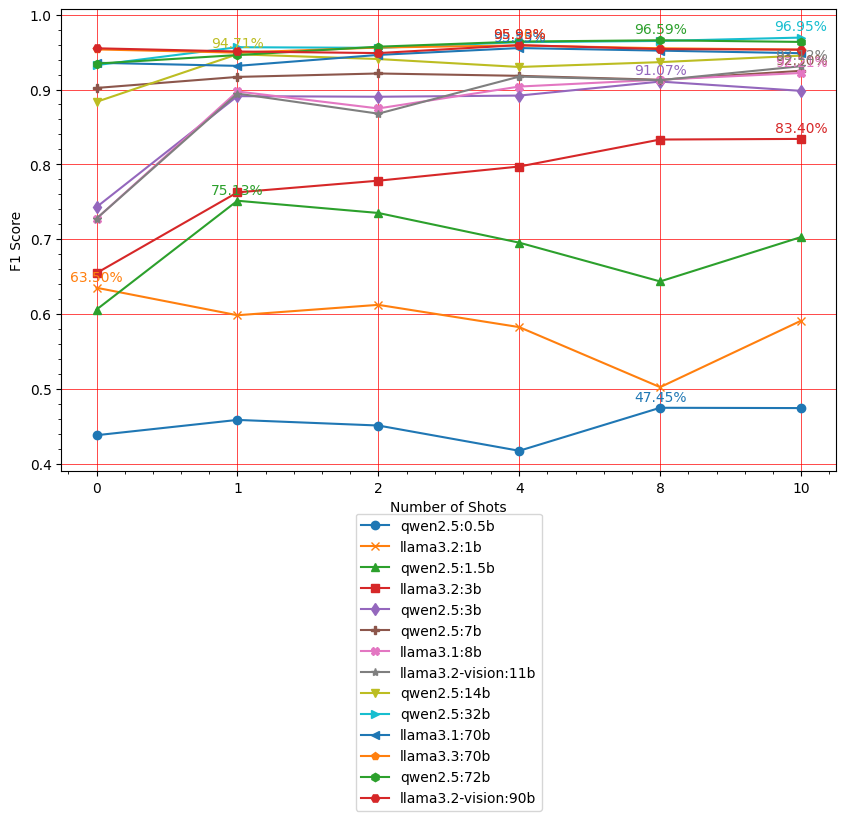

In [62]:
plot_metrics_vs_shots(
    metrics_df,
    models,
    markers,
    ["f1"],
    ["F1 Score"],
    bbox_to_anchor=(0.5, -0.75),
)

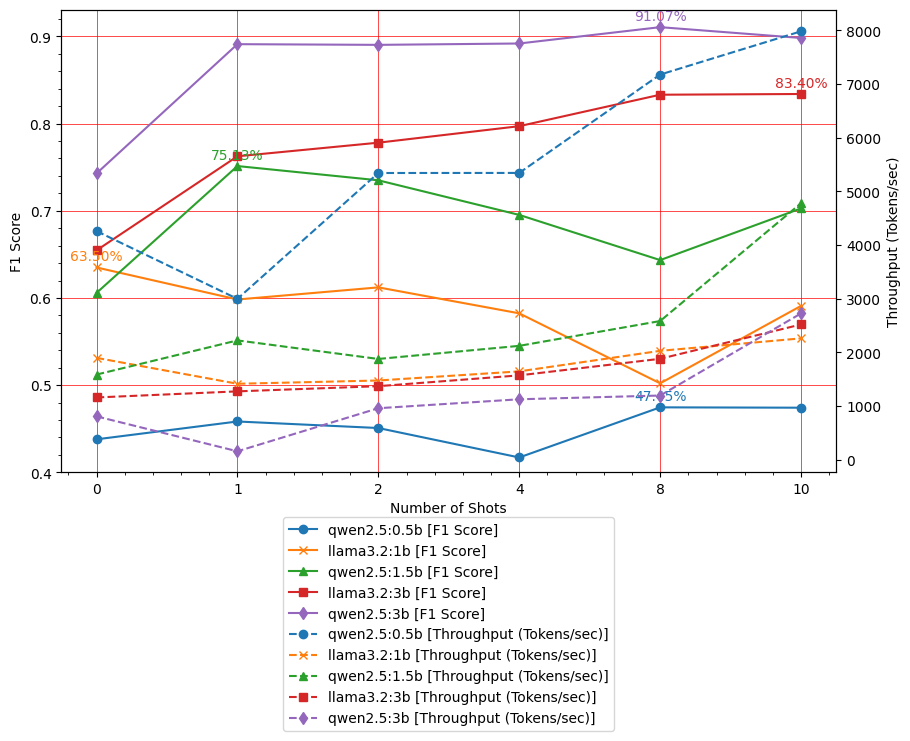

In [63]:
plot_metrics_vs_shots(
    metrics_df,
    models[:5],
    markers[:5],
    ["f1", "eval_speed"],
    ["F1 Score", "Throughput (Tokens/sec)"],
    ylimits=(0.4, 0.92),
    # log_scales=[True],
    bbox_to_anchor=(0.5, -0.575),
)

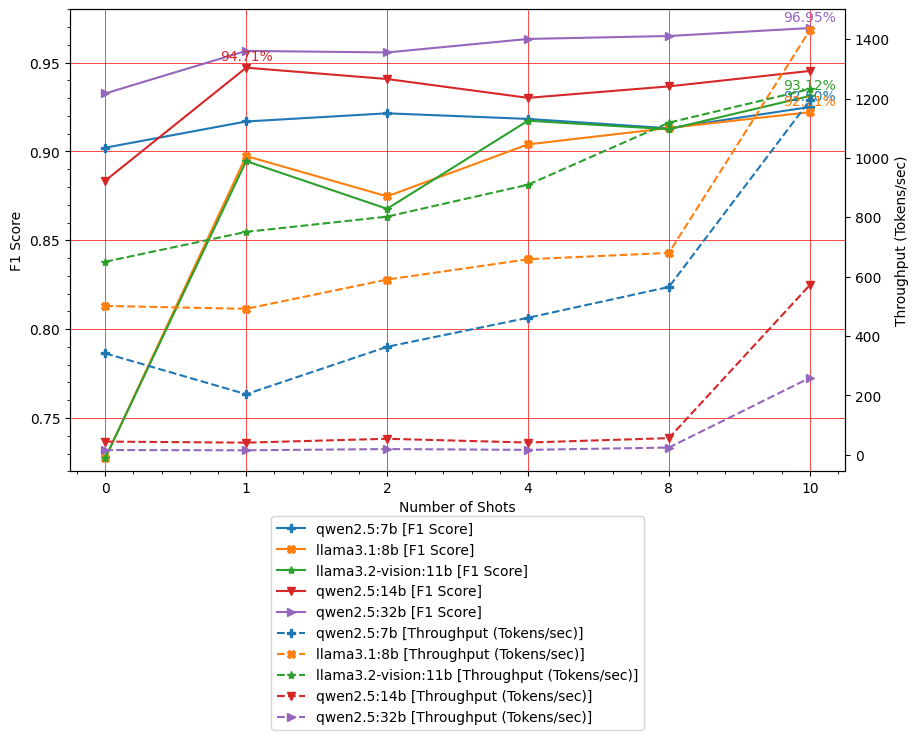

In [64]:
plot_metrics_vs_shots(
    metrics_df,
    models[5:10],
    markers[5:10],
    ["f1", "eval_speed"],
    ["F1 Score", "Throughput (Tokens/sec)"],
    ylimits=(0.72, 0.97),
    # log_scales=[False, True],
    bbox_to_anchor=(0.5, -0.575),
)

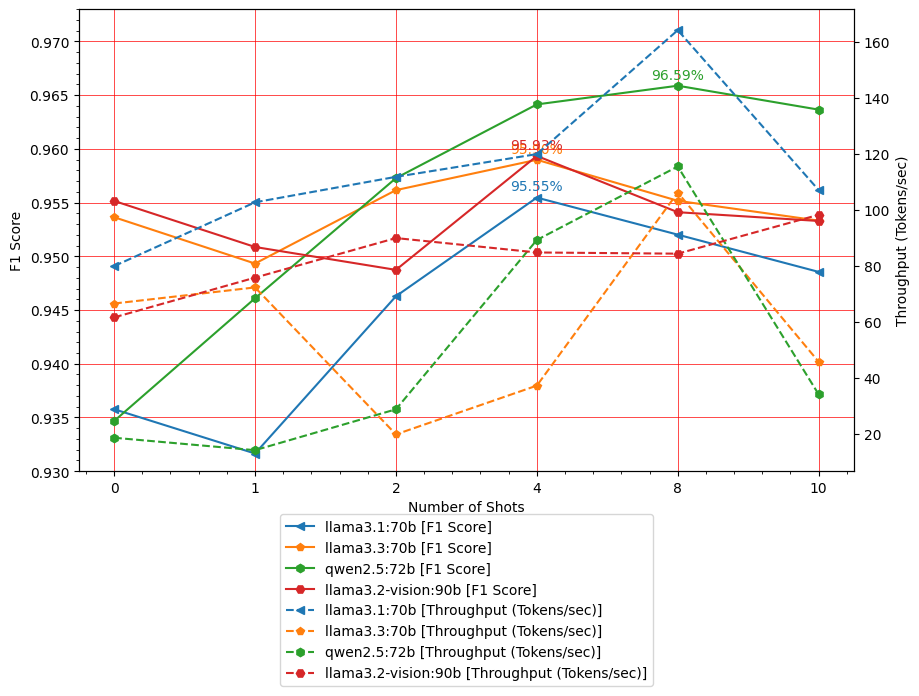

In [65]:
plot_metrics_vs_shots(
    metrics_df,
    models[10:],
    markers[10:],
    ["f1", "eval_speed"],
    ["F1 Score", "Throughput (Tokens/sec)"],
    # log_scales=[True],
    ylimits=(0.93, 0.97),
    ylimits_offset=0.003,
    bbox_to_anchor=(0.5, -0.48),
)

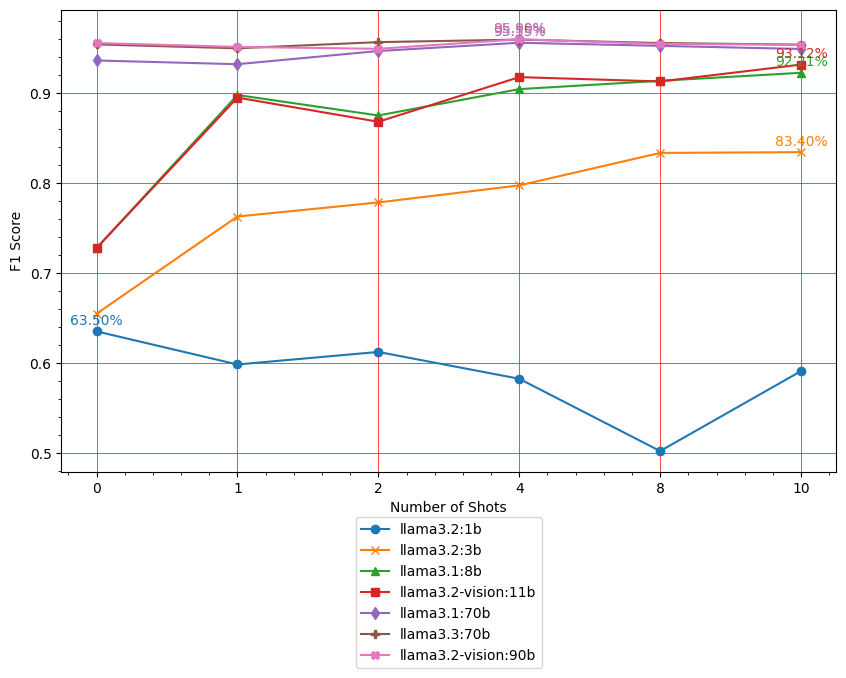

In [66]:
plot_metrics_vs_shots(
    metrics_df,
    llama_models,
    markers,
    ["f1"],
    ["F1 Score"],
    bbox_to_anchor=(0.5, -0.44),
)

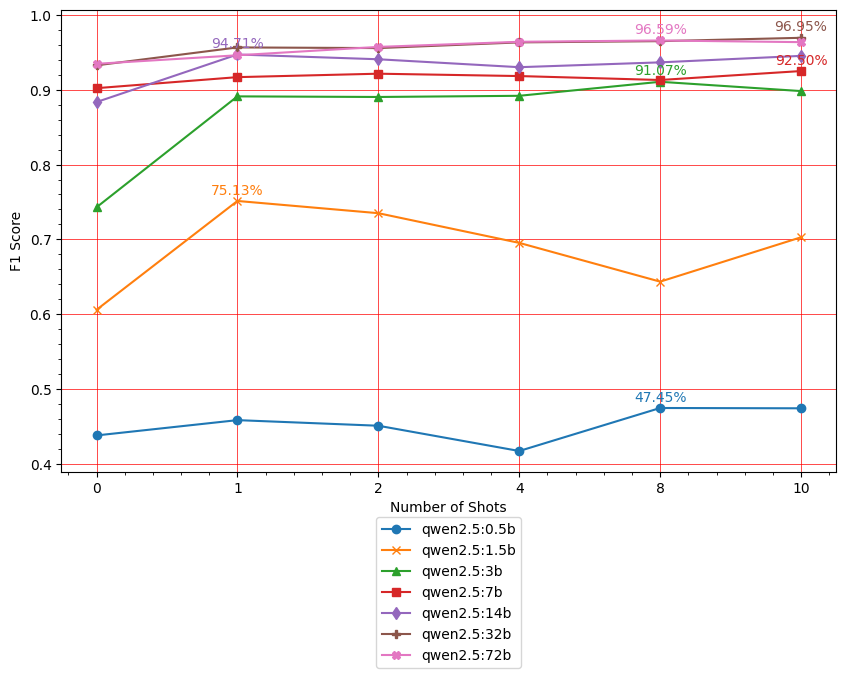

In [67]:
plot_metrics_vs_shots(
    metrics_df,
    qwen_models,
    markers,
    ["f1"],
    ["F1 Score"],
    bbox_to_anchor=(0.5, -0.44),
)

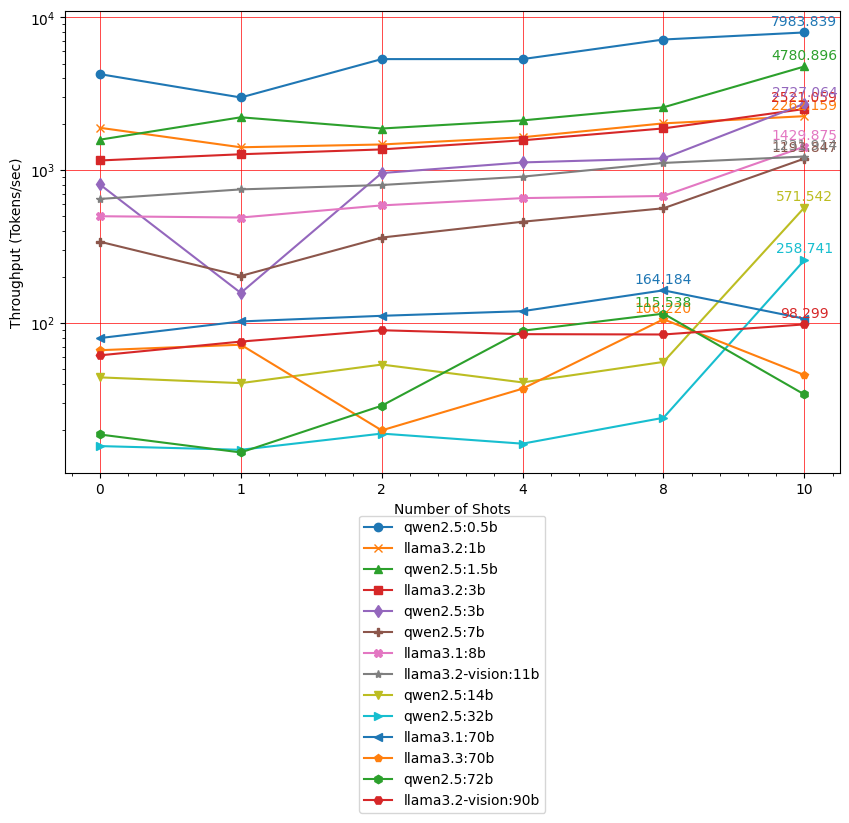

In [68]:
plot_metrics_vs_shots(
    metrics_df,
    models,
    markers,
    ["eval_speed"],
    ["Throughput (Tokens/sec)"],
    log_scales=[True],
    bbox_to_anchor=(0.5, -0.75),
    use_percentage=False,
)

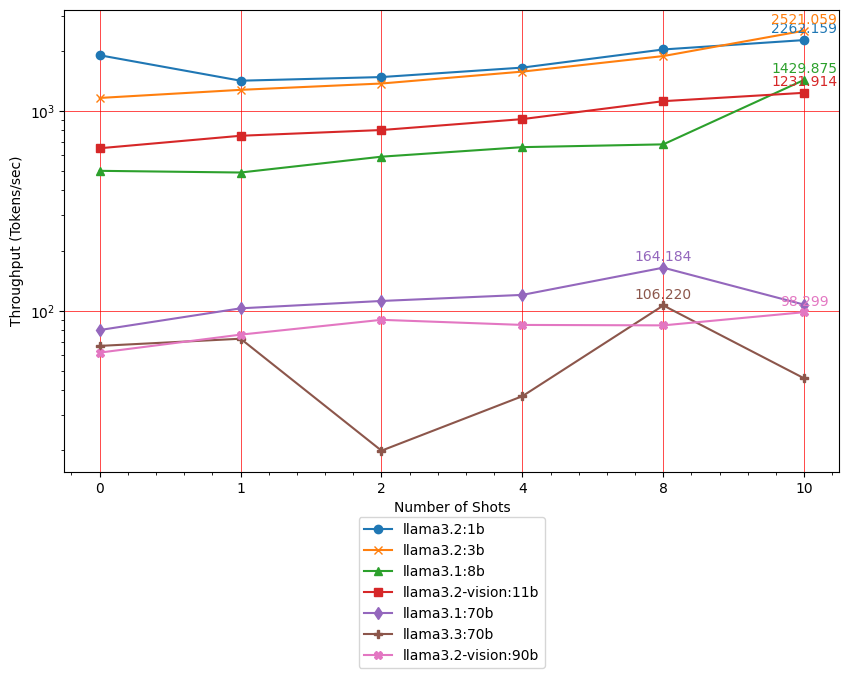

In [69]:
plot_metrics_vs_shots(
    metrics_df,
    llama_models,
    markers,
    ["eval_speed"],
    ["Throughput (Tokens/sec)"],
    log_scales=[True],
    bbox_to_anchor=(0.5, -0.44),
    use_percentage=False,
)

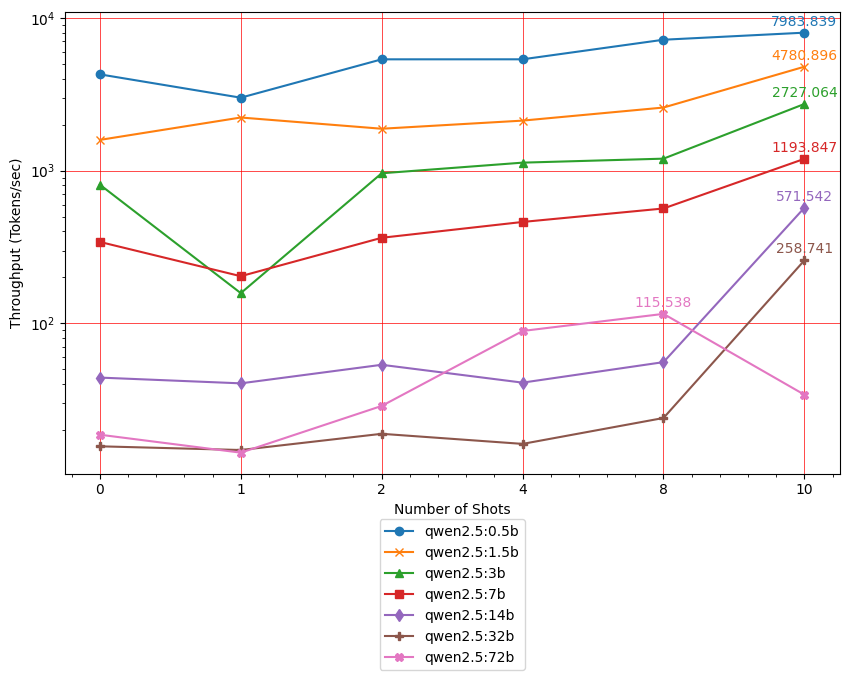

In [70]:
plot_metrics_vs_shots(
    metrics_df,
    qwen_models,
    markers,
    ["eval_speed"],
    ["Throughput (Tokens/sec)"],
    log_scales=[True],
    bbox_to_anchor=(0.5, -0.44),
    use_percentage=False,
)

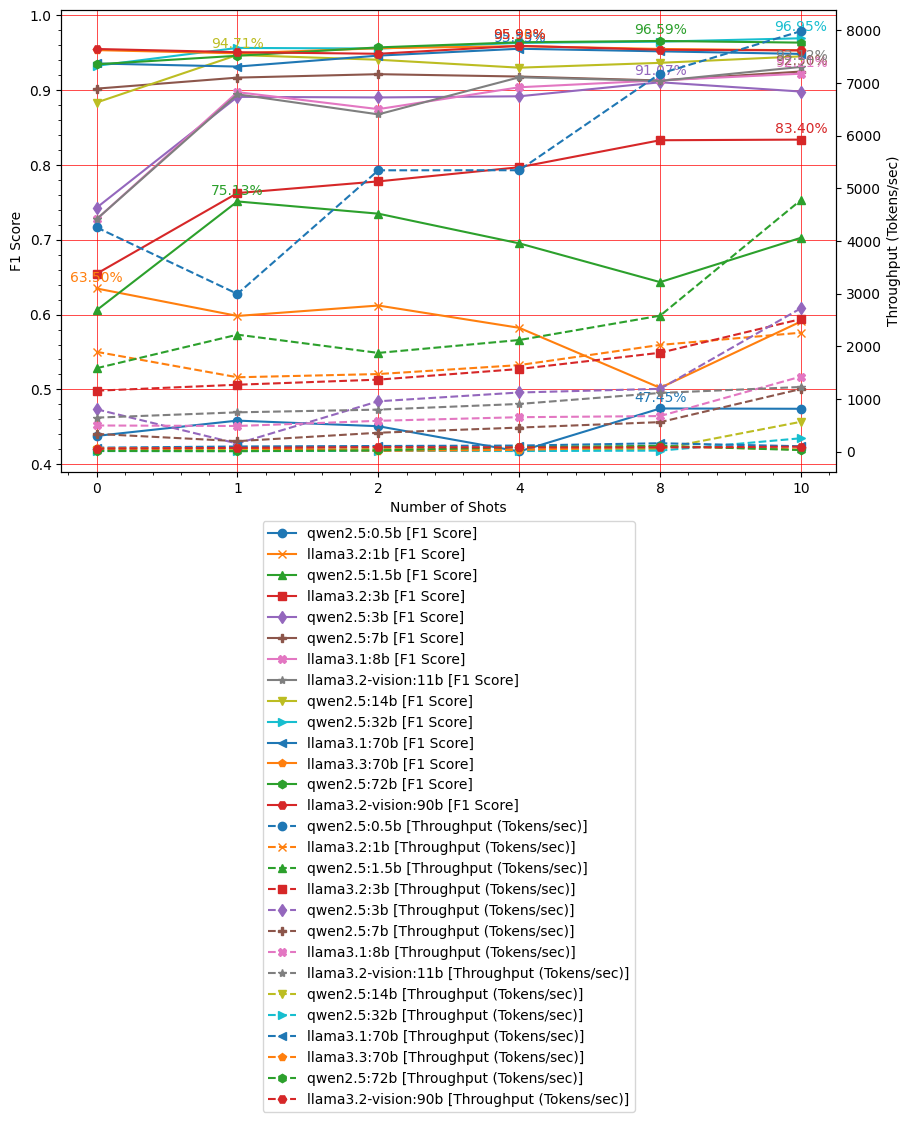

In [71]:
plot_metrics_vs_shots(
    metrics_df,
    models,
    markers,
    ["f1", "eval_speed"],
    ["F1 Score", "Throughput (Tokens/sec)"],
    bbox_to_anchor=(0.5, -1.4),
)

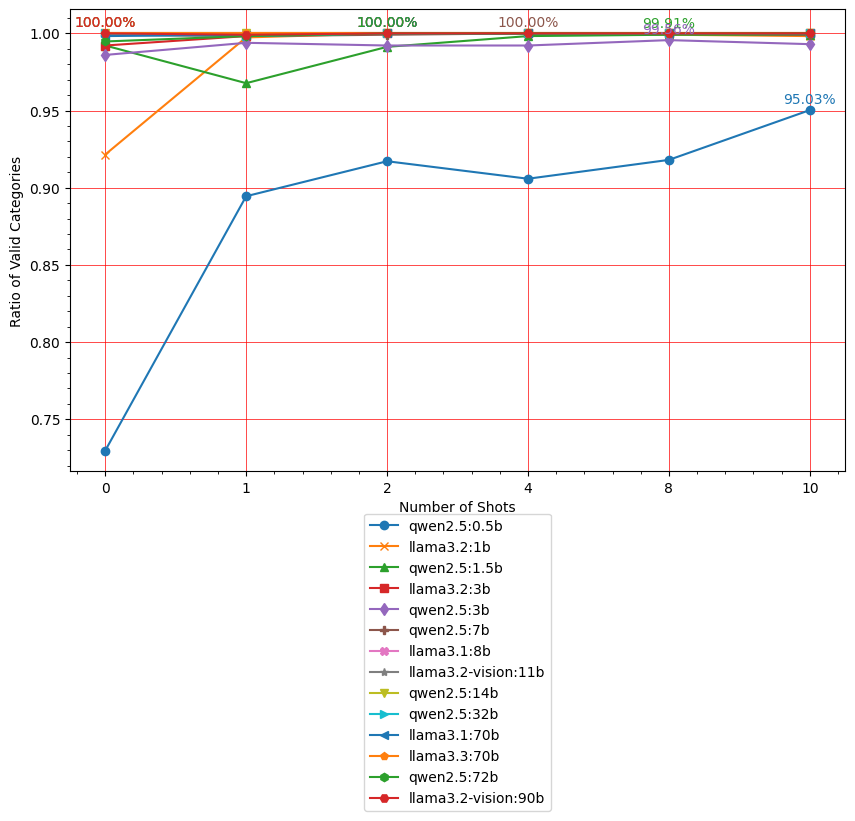

In [72]:
plot_metrics_vs_shots(
    metrics_df,
    models,
    markers,
    ["ratio_valid_categories"],
    ["Ratio of Valid Categories"],
    # log_scales=[True],
    bbox_to_anchor=(0.5, -0.75),
    ylimits_offset=0.002,
)

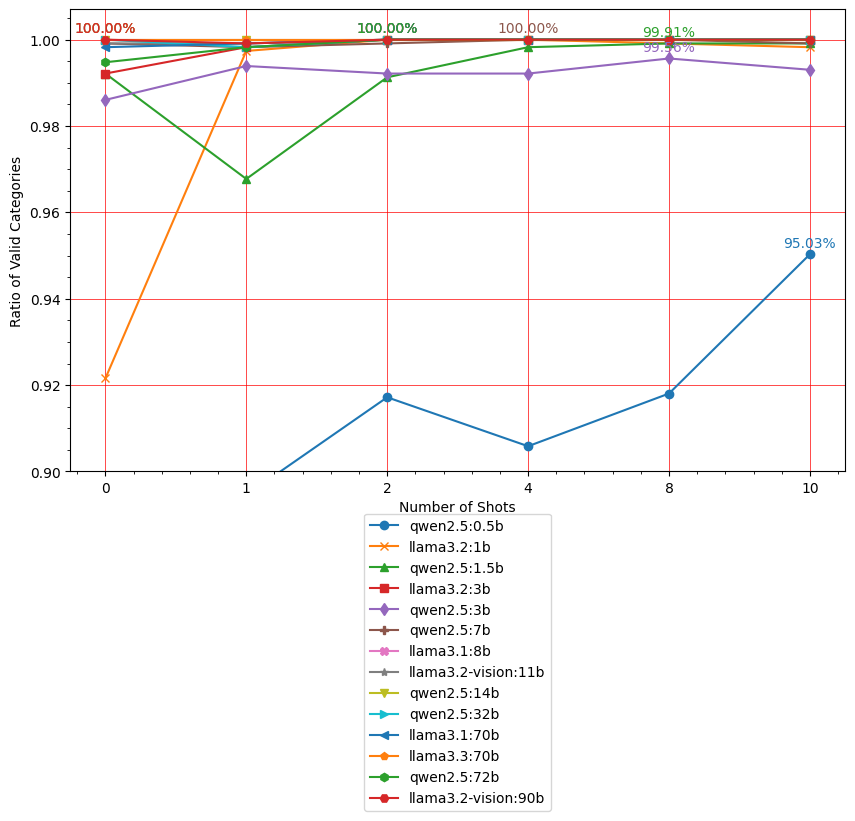

In [73]:
plot_metrics_vs_shots(
    metrics_df,
    models,
    markers,
    ["ratio_valid_categories"],
    ["Ratio of Valid Categories"],
    # log_scales=[True],
    bbox_to_anchor=(0.5, -0.75),
    ylimits=[0.9, 1.005],
    ylimits_offset=0.002,
)

In [74]:
top_metrics_df = get_top_metrics_df(metrics_df)
top_metrics_df

model  shots  eval_time        f1  accuracy  f1_raw  \
4          qwen2.5:0.5b      8      0.258  0.474512  0.514385     0.0   
6           llama3.2:1b      0      0.570  0.634983  0.582389     0.0   
13         qwen2.5:1.5b      1      0.527  0.751314  0.673932     0.0   
23          llama3.2:3b     10      0.829  0.833979  0.828248     0.0   
28           qwen2.5:3b      8      1.547  0.910654  0.894507     0.0   
35           qwen2.5:7b     10      1.760  0.925007  0.918919     0.0   
41          llama3.1:8b     10      1.461  0.922112  0.921534     0.0   
47  llama3.2-vision:11b     10      1.696  0.931205  0.931125     0.0   
49          qwen2.5:14b      1     28.912  0.947141  0.943330     0.0   
59          qwen2.5:32b     10      8.131  0.969455  0.967742     0.0   
63         llama3.1:70b      4     12.293  0.955464  0.956408     0.0   
69         llama3.3:70b      4     39.523  0.958984  0.959895     0.0   
76          qwen2.5:72b      8     16.055  0.965877  0.963383     0.0   
81  llama3.2-vision:90b      4     17.379  0.959342  0.959895     0.0   

    accuracy_raw  ratio_valid_categories  total_tokens   eval_speed  
4            0.0                0.918047       2124019  7177.534248  
6            0.0                0.921534       1241598  1899.077685  
13           0.0                0.967742       1344603  2224.436654  
23           0.0                1.000000       2397182  2521.059290  
28           0.0                0.995641       2123959  1196.995169  
35           0.0                0.999128       2410042  1193.846596  
41           0.0                1.000000       2396138  1429.875394  
47           0.0                1.000000       2396458  1231.914469  
49           0.0                1.000000       1345706    40.579682  
59           0.0                1.000000       2413086   258.741101  
63           0.0                1.000000       1691414   119.957836  
69           0.0                1.000000       1692313    37.330806  
76           0.0                1.000000       2127639   115.537832  
81           0.0                1.000000       1691400    84.851227

/Users/inflaton/code/engd/papers/maritime-incidents-ai-agents/llm_toolkit/data_utils.py:1125: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(df['model'], rotation=45, ha='right')


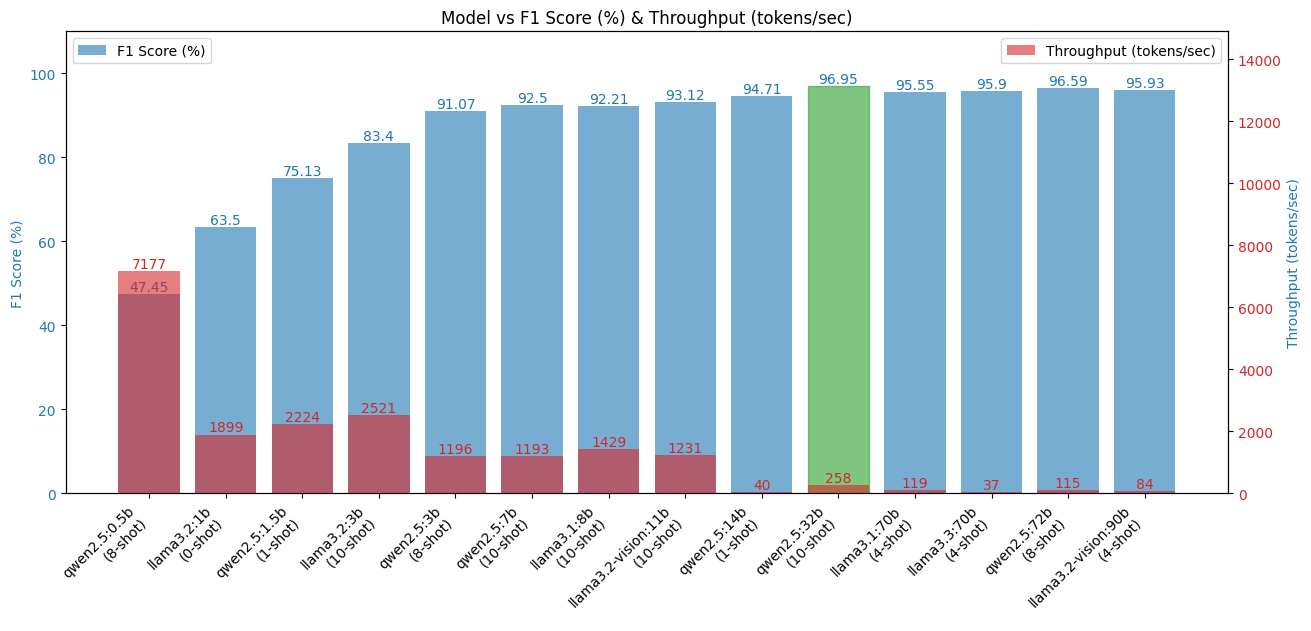

In [75]:
plot_metrics_bar_charts(top_metrics_df, second_ylim=[0, 14900])

/Users/inflaton/code/engd/papers/maritime-incidents-ai-agents/llm_toolkit/data_utils.py:1125: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(df['model'], rotation=45, ha='right')


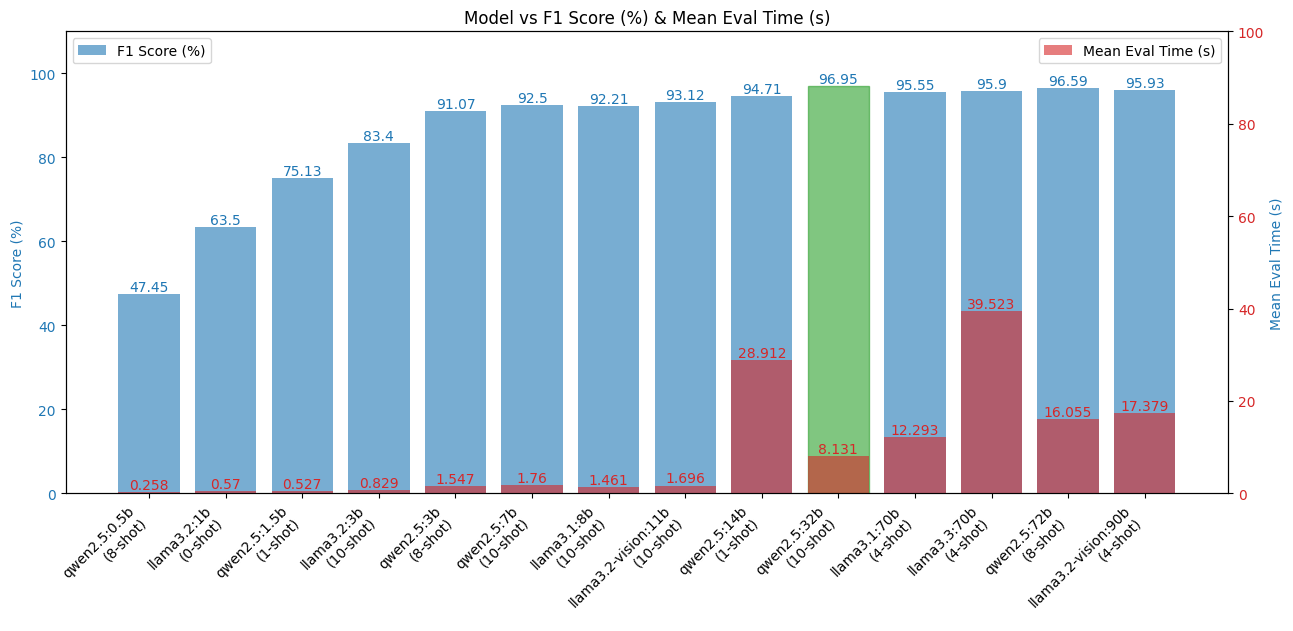

In [76]:
plot_metrics_bar_charts(
    top_metrics_df,
    second_column="eval_time",
    second_title="Mean Eval Time (s)",
    second_ylim=(0, 100),
    second_decimals=3,
)

In [77]:
ensemble_models = [
    m
    for m in all_models
    if "fp" not in m
    and top_metrics_df[top_metrics_df["model"] == m].iloc[0]["f1"] >= 0.9
]
ensemble_models

['qwen2.5:3b',
 'qwen2.5:7b',
 'llama3.1:8b',
 'llama3.2-vision:11b',
 'qwen2.5:14b',
 'qwen2.5:32b',
 'llama3.1:70b',
 'llama3.3:70b',
 'qwen2.5:72b',
 'llama3.2-vision:90b']

In [78]:
ensemble_models = ensemble_models[:5]
ensemble_models

['qwen2.5:3b',
 'qwen2.5:7b',
 'llama3.1:8b',
 'llama3.2-vision:11b',
 'qwen2.5:14b']

In [79]:
def majority_vote(v1, v2, v3):
    v1_ans, v2_ans, v3_ans = extract_answer(v1), extract_answer(v2), extract_answer(v3)
    if v2_ans == v3_ans and v3_ans != v1_ans:
        return v2

    return v1

In [80]:
import itertools

permutations = list(itertools.combinations(ensemble_models, 3))

for perm in permutations:
    print(perm)

('qwen2.5:3b', 'qwen2.5:7b', 'llama3.1:8b')
('qwen2.5:3b', 'qwen2.5:7b', 'llama3.2-vision:11b')
('qwen2.5:3b', 'qwen2.5:7b', 'qwen2.5:14b')
('qwen2.5:3b', 'llama3.1:8b', 'llama3.2-vision:11b')
('qwen2.5:3b', 'llama3.1:8b', 'qwen2.5:14b')
('qwen2.5:3b', 'llama3.2-vision:11b', 'qwen2.5:14b')
('qwen2.5:7b', 'llama3.1:8b', 'llama3.2-vision:11b')
('qwen2.5:7b', 'llama3.1:8b', 'qwen2.5:14b')
('qwen2.5:7b', 'llama3.2-vision:11b', 'qwen2.5:14b')
('llama3.1:8b', 'llama3.2-vision:11b', 'qwen2.5:14b')


In [81]:
for perm in permutations:
    print(perm)
    selected_rows = top_metrics_df[top_metrics_df["model"].isin(perm)]
    selected_rows = selected_rows.sort_values(by="f1", ascending=False)

    columns = []
    shots = 0
    eval_time = 0
    title = None
    for idx, row in selected_rows.iterrows():
        columns.append(
            f"{row['model']}/shots-{row['shots']:02d}({row['eval_time']:.3f})"
        )
        shots += row["shots"]
        eval_time += row["eval_time"]
        if title:
            title += f"_{row['model']}"
        else:
            title = row["model"]

    print(title, eval_time, columns)

    df_results[f"{title}/shots-{shots}({eval_time:.3f})"] = df_results.apply(
        lambda x: majority_vote(x[columns[0]], x[columns[1]], x[columns[2]]), axis=1
    )

('qwen2.5:3b', 'qwen2.5:7b', 'llama3.1:8b')
qwen2.5:7b_llama3.1:8b_qwen2.5:3b 4.768 ['qwen2.5:7b/shots-10(1.760)', 'llama3.1:8b/shots-10(1.461)', 'qwen2.5:3b/shots-08(1.547)']
('qwen2.5:3b', 'qwen2.5:7b', 'llama3.2-vision:11b')
llama3.2-vision:11b_qwen2.5:7b_qwen2.5:3b 5.003 ['llama3.2-vision:11b/shots-10(1.696)', 'qwen2.5:7b/shots-10(1.760)', 'qwen2.5:3b/shots-08(1.547)']
('qwen2.5:3b', 'qwen2.5:7b', 'qwen2.5:14b')
qwen2.5:14b_qwen2.5:7b_qwen2.5:3b 32.219 ['qwen2.5:14b/shots-01(28.912)', 'qwen2.5:7b/shots-10(1.760)', 'qwen2.5:3b/shots-08(1.547)']
('qwen2.5:3b', 'llama3.1:8b', 'llama3.2-vision:11b')
llama3.2-vision:11b_llama3.1:8b_qwen2.5:3b 4.704 ['llama3.2-vision:11b/shots-10(1.696)', 'llama3.1:8b/shots-10(1.461)', 'qwen2.5:3b/shots-08(1.547)']
('qwen2.5:3b', 'llama3.1:8b', 'qwen2.5:14b')
qwen2.5:14b_llama3.1:8b_qwen2.5:3b 31.919999999999998 ['qwen2.5:14b/shots-01(28.912)', 'llama3.1:8b/shots-10(1.461)', 'qwen2.5:3b/shots-08(1.547)']
('qwen2.5:3b', 'llama3.2-vision:11b', 'qwen2.5:14b

In [82]:
ensemble_metrics_df = get_metrics(
    df_results, -len(permutations), mean_eval_time=True, label_column="gpt-4o_label"
)
ensemble_metrics_df

qwen2.5:7b_llama3.1:8b_qwen2.5:3b/shots-28(4.768) - metrics_raw: {'f1': 0.0, 'accuracy': 0.0}
qwen2.5:7b_llama3.1:8b_qwen2.5:3b/shots-28(4.768) - metrics: {'f1': 0.9411471290544658, 'accuracy': 0.937227550130776}
Generating prompt templates for 28 shots with Headline_Details and gpt-4o_label
llama3.2-vision:11b_qwen2.5:7b_qwen2.5:3b/shots-28(5.003) - metrics_raw: {'f1': 0.0, 'accuracy': 0.0}
llama3.2-vision:11b_qwen2.5:7b_qwen2.5:3b/shots-28(5.003) - metrics: {'f1': 0.9403817556107735, 'accuracy': 0.9380993897122929}
Generating prompt templates for 28 shots with Headline_Details and gpt-4o_label
qwen2.5:14b_qwen2.5:7b_qwen2.5:3b/shots-19(32.219) - metrics_raw: {'f1': 0.0, 'accuracy': 0.0}
qwen2.5:14b_qwen2.5:7b_qwen2.5:3b/shots-19(32.219) - metrics: {'f1': 0.9389330639018317, 'accuracy': 0.9337401918047079}
Generating prompt templates for 19 shots with Headline_Details and gpt-4o_label
llama3.2-vision:11b_llama3.1:8b_qwen2.5:3b/shots-28(4.704) - metrics_raw: {'f1': 0.0, 'accuracy': 0.0

model  shots  eval_time        f1  \
0            qwen2.5:7b_llama3.1:8b_qwen2.5:3b     28      4.768  0.941147   
1    llama3.2-vision:11b_qwen2.5:7b_qwen2.5:3b     28      5.003  0.940382   
2            qwen2.5:14b_qwen2.5:7b_qwen2.5:3b     19     32.219  0.938933   
3   llama3.2-vision:11b_llama3.1:8b_qwen2.5:3b     28      4.704  0.937838   
4           qwen2.5:14b_llama3.1:8b_qwen2.5:3b     19     31.920  0.946683   
5   qwen2.5:14b_llama3.2-vision:11b_qwen2.5:3b     19     32.155  0.949356   
6   llama3.2-vision:11b_qwen2.5:7b_llama3.1:8b     30      4.917  0.939609   
7           qwen2.5:14b_qwen2.5:7b_llama3.1:8b     21     32.133  0.944557   
8   qwen2.5:14b_llama3.2-vision:11b_qwen2.5:7b     21     32.368  0.949918   
9  qwen2.5:14b_llama3.2-vision:11b_llama3.1:8b     21     32.069  0.940486   

   accuracy  f1_raw  accuracy_raw  ratio_valid_categories  total_tokens  \
0  0.937228     0.0           0.0                0.999128       2505182   
1  0.938099     0.0           0.0                1.000000       2504913   
2  0.933740     0.0           0.0                1.000000       2505333   
3  0.936356     0.0           0.0                1.000000       2504955   
4  0.943330     0.0           0.0                1.000000       2505282   
5  0.947690     0.0           0.0                1.000000       2505326   
6  0.938971     0.0           0.0                1.000000       2504980   
7  0.942459     0.0           0.0                1.000000       2505331   
8  0.949433     0.0           0.0                1.000000       2505321   
9  0.941587     0.0           0.0                1.000000       2505357   

   eval_speed  
0  458.078193  
1  436.514552  
2   67.793801  
3  464.268478  
4   68.427444  
5   67.928545  
6  444.161219  
7   67.975188  
8   67.481402  
9   68.111553

In [83]:
top_performance = {row["model"]: row["f1"] for _, row in top_metrics_df.iterrows()}
top_performance

{'qwen2.5:0.5b': 0.4745123553383256,
 'llama3.2:1b': 0.6349826035016647,
 'qwen2.5:1.5b': 0.7513135985018424,
 'llama3.2:3b': 0.8339788228803919,
 'qwen2.5:3b': 0.9106537287895762,
 'qwen2.5:7b': 0.9250066630976738,
 'llama3.1:8b': 0.9221122018028491,
 'llama3.2-vision:11b': 0.9312053545164901,
 'qwen2.5:14b': 0.9471408016612802,
 'qwen2.5:32b': 0.9694548384755698,
 'llama3.1:70b': 0.9554636671274578,
 'llama3.3:70b': 0.9589844771752568,
 'qwen2.5:72b': 0.9658769432663517,
 'llama3.2-vision:90b': 0.9593418068496501}

In [84]:
indices = []
for idx, row in ensemble_metrics_df.iterrows():
    for model in top_performance.keys():
        if row["model"].startswith(model) and row["f1"] > top_performance[model]:
            indices.append(idx)
            break

ensemble_metrics_df = ensemble_metrics_df.loc[indices]
ensemble_metrics_df

model  shots  eval_time        f1  \
0           qwen2.5:7b_llama3.1:8b_qwen2.5:3b     28      4.768  0.941147   
1   llama3.2-vision:11b_qwen2.5:7b_qwen2.5:3b     28      5.003  0.940382   
3  llama3.2-vision:11b_llama3.1:8b_qwen2.5:3b     28      4.704  0.937838   
5  qwen2.5:14b_llama3.2-vision:11b_qwen2.5:3b     19     32.155  0.949356   
6  llama3.2-vision:11b_qwen2.5:7b_llama3.1:8b     30      4.917  0.939609   
8  qwen2.5:14b_llama3.2-vision:11b_qwen2.5:7b     21     32.368  0.949918   

   accuracy  f1_raw  accuracy_raw  ratio_valid_categories  total_tokens  \
0  0.937228     0.0           0.0                0.999128       2505182   
1  0.938099     0.0           0.0                1.000000       2504913   
3  0.936356     0.0           0.0                1.000000       2504955   
5  0.947690     0.0           0.0                1.000000       2505326   
6  0.938971     0.0           0.0                1.000000       2504980   
8  0.949433     0.0           0.0                1.000000       2505321   

   eval_speed  
0  458.078193  
1  436.514552  
3  464.268478  
5   67.928545  
6  444.161219  
8   67.481402

In [85]:
# Concatenate vertically
top_metrics_df = pd.concat([top_metrics_df, ensemble_metrics_df], axis=0).reset_index(
    drop=True
)
top_metrics_df

model  shots  eval_time        f1  \
0                                 qwen2.5:0.5b      8      0.258  0.474512   
1                                  llama3.2:1b      0      0.570  0.634983   
2                                 qwen2.5:1.5b      1      0.527  0.751314   
3                                  llama3.2:3b     10      0.829  0.833979   
4                                   qwen2.5:3b      8      1.547  0.910654   
5                                   qwen2.5:7b     10      1.760  0.925007   
6                                  llama3.1:8b     10      1.461  0.922112   
7                          llama3.2-vision:11b     10      1.696  0.931205   
8                                  qwen2.5:14b      1     28.912  0.947141   
9                                  qwen2.5:32b     10      8.131  0.969455   
10                                llama3.1:70b      4     12.293  0.955464   
11                                llama3.3:70b      4     39.523  0.958984   
12                                 qwen2.5:72b      8     16.055  0.965877   
13                         llama3.2-vision:90b      4     17.379  0.959342   
14           qwen2.5:7b_llama3.1:8b_qwen2.5:3b     28      4.768  0.941147   
15   llama3.2-vision:11b_qwen2.5:7b_qwen2.5:3b     28      5.003  0.940382   
16  llama3.2-vision:11b_llama3.1:8b_qwen2.5:3b     28      4.704  0.937838   
17  qwen2.5:14b_llama3.2-vision:11b_qwen2.5:3b     19     32.155  0.949356   
18  llama3.2-vision:11b_qwen2.5:7b_llama3.1:8b     30      4.917  0.939609   
19  qwen2.5:14b_llama3.2-vision:11b_qwen2.5:7b     21     32.368  0.949918   

    accuracy  f1_raw  accuracy_raw  ratio_valid_categories  total_tokens  \
0   0.514385     0.0           0.0                0.918047       2124019   
1   0.582389     0.0           0.0                0.921534       1241598   
2   0.673932     0.0           0.0                0.967742       1344603   
3   0.828248     0.0           0.0                1.000000       2397182   
4   0.894507     0.0           0.0                0.995641       2123959   
5   0.918919     0.0           0.0                0.999128       2410042   
6   0.921534     0.0           0.0                1.000000       2396138   
7   0.931125     0.0           0.0                1.000000       2396458   
8   0.943330     0.0           0.0                1.000000       1345706   
9   0.967742     0.0           0.0                1.000000       2413086   
10  0.956408     0.0           0.0                1.000000       1691414   
11  0.959895     0.0           0.0                1.000000       1692313   
12  0.963383     0.0           0.0                1.000000       2127639   
13  0.959895     0.0           0.0                1.000000       1691400   
14  0.937228     0.0           0.0                0.999128       2505182   
15  0.938099     0.0           0.0                1.000000       2504913   
16  0.936356     0.0           0.0                1.000000       2504955   
17  0.947690     0.0           0.0                1.000000       2505326   
18  0.938971     0.0           0.0                1.000000       2504980   
19  0.949433     0.0           0.0                1.000000       2505321   

     eval_speed  
0   7177.534248  
1   1899.077685  
2   2224.436654  
3   2521.059290  
4   1196.995169  
5   1193.846596  
6   1429.875394  
7   1231.914469  
8     40.579682  
9    258.741101  
10   119.957836  
11    37.330806  
12   115.537832  
13    84.851227  
14   458.078193  
15   436.514552  
16   464.268478  
17    67.928545  
18   444.161219  
19    67.481402

In [86]:
best_top_metrics_df = top_metrics_df[top_metrics_df["f1"] >= 0.9]

/Users/inflaton/code/engd/papers/maritime-incidents-ai-agents/llm_toolkit/data_utils.py:1125: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(df['model'], rotation=45, ha='right')


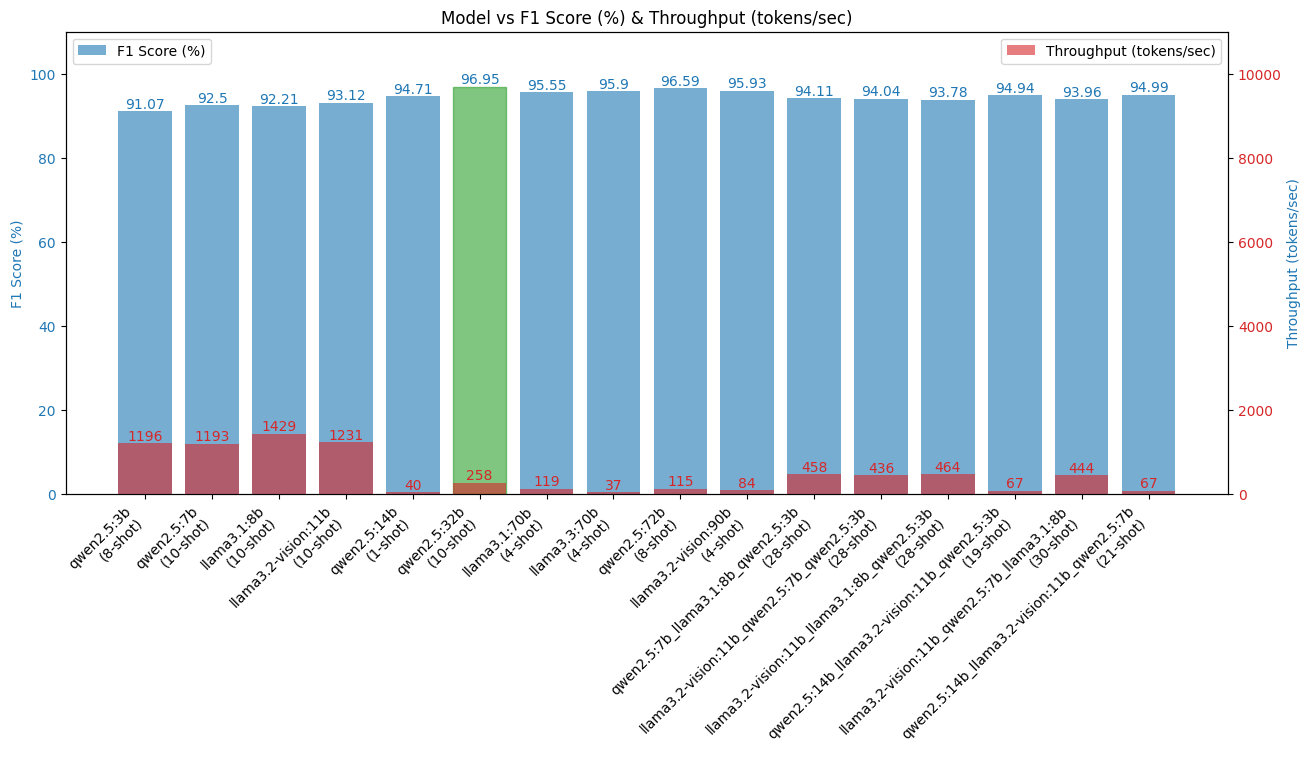

In [87]:
plot_metrics_bar_charts(best_top_metrics_df, second_ylim=[0, 11000])

/Users/inflaton/code/engd/papers/maritime-incidents-ai-agents/llm_toolkit/data_utils.py:1125: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(df['model'], rotation=45, ha='right')


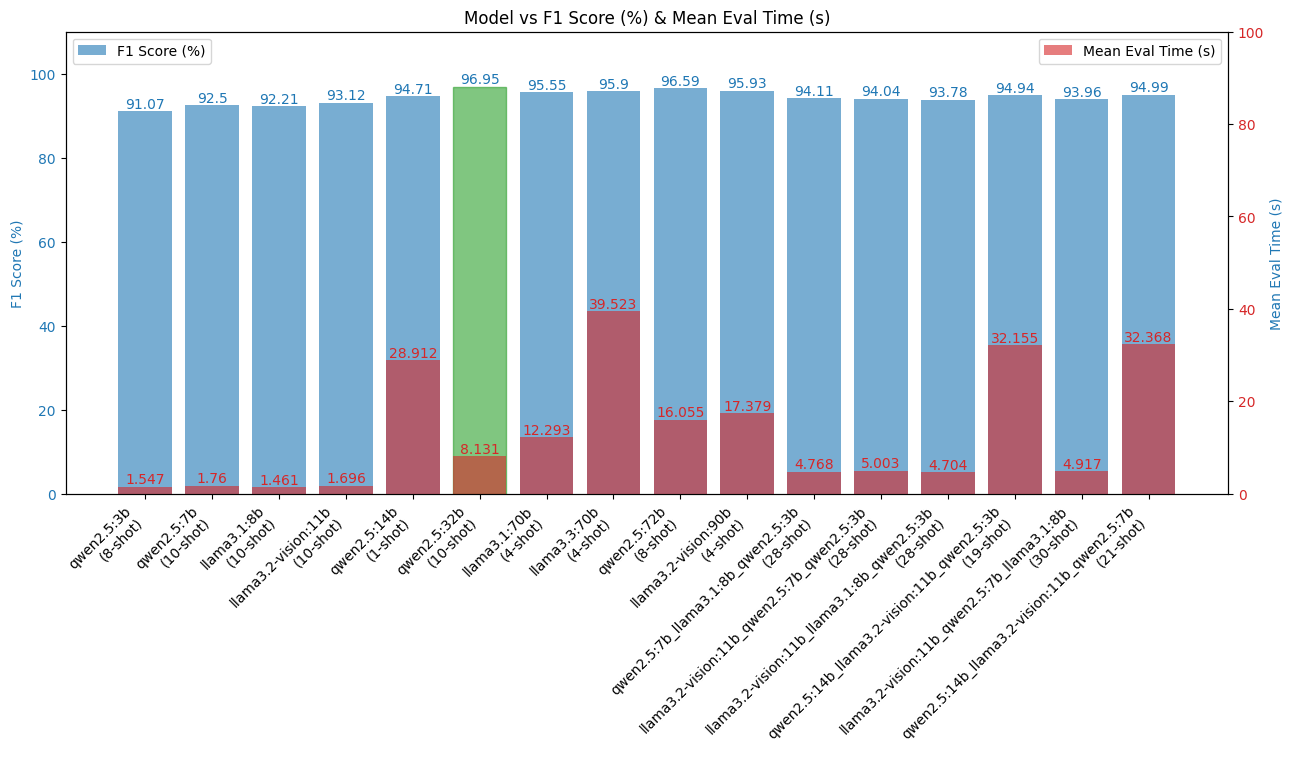

In [88]:
plot_metrics_bar_charts(
    best_top_metrics_df,
    second_column="eval_time",
    second_title="Mean Eval Time (s)",
    second_ylim=(0, 100),
    second_decimals=3,
)

In [89]:
top_metrics_df.describe()

shots  eval_time         f1   accuracy  f1_raw  accuracy_raw  \
count  20.000000  20.000000  20.000000  20.000000    20.0          20.0   
mean   12.100000  10.742800   0.889914   0.883173     0.0           0.0   
std     9.914901  12.679029   0.127861   0.132432     0.0           0.0   
min     0.000000   0.258000   0.474512   0.514385     0.0           0.0   
25%     4.000000   1.525500   0.919248   0.912816     0.0           0.0   
50%    10.000000   4.842500   0.939995   0.937663     0.0           0.0   
75%    19.500000  16.386000   0.951304   0.951177     0.0           0.0   
max    30.000000  39.523000   0.969455   0.967742     0.0           0.0   

       ratio_valid_categories  total_tokens   eval_speed  
count               20.000000  2.000000e+01    20.000000  
mean                 0.990061  2.121312e+06  1073.508519  
std                  0.025088  4.479265e+05  1633.956522  
min                  0.918047  1.241598e+06    37.330806  
25%                  0.999128  1.692088e+06   107.866181  
50%                  1.000000  2.396298e+06   451.119706  
75%                  1.000000  2.504924e+06  1281.404701  
max                  1.000000  2.505326e+06  7177.534248

In [90]:
metrics_df.to_csv(results_path.replace(".csv", "_metrics.csv"), index=False)
top_metrics_df.to_csv(results_path.replace(".csv", "_top_metrics.csv"), index=False)

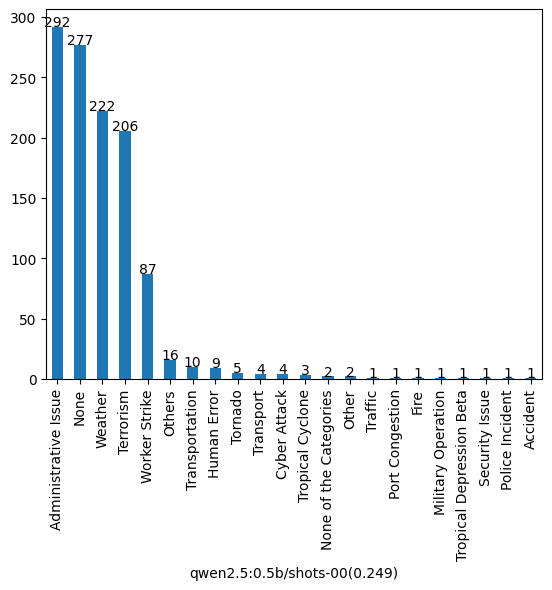

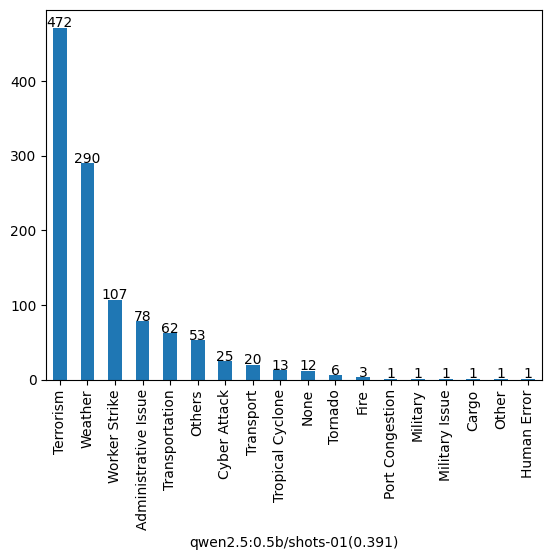

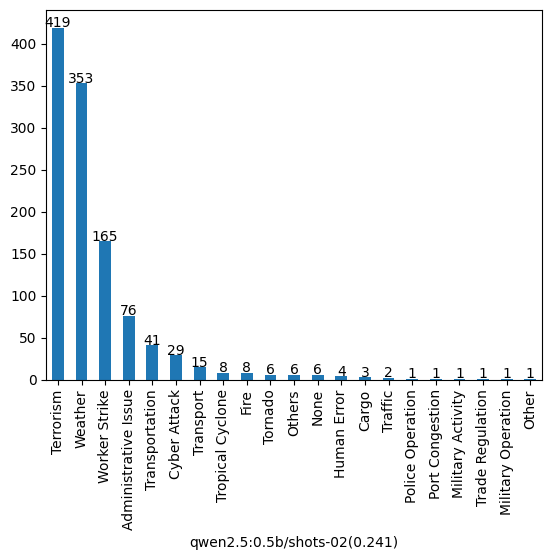

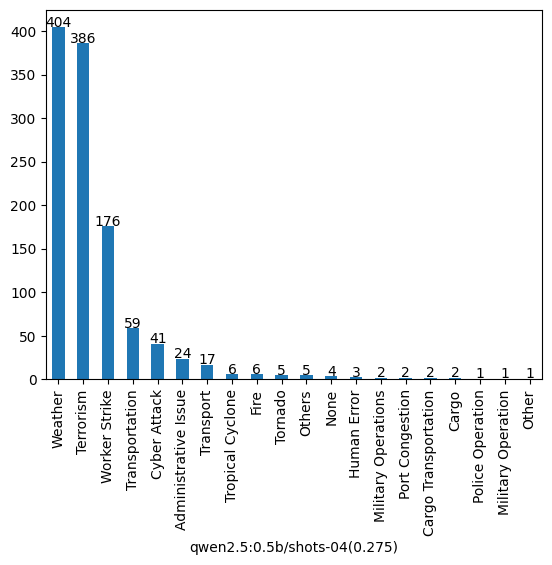

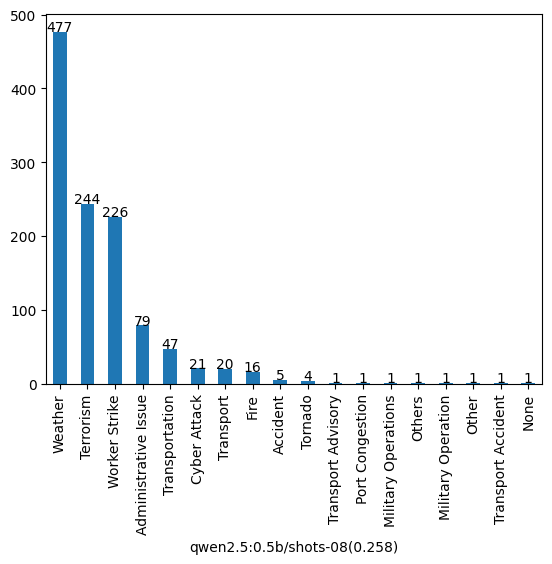

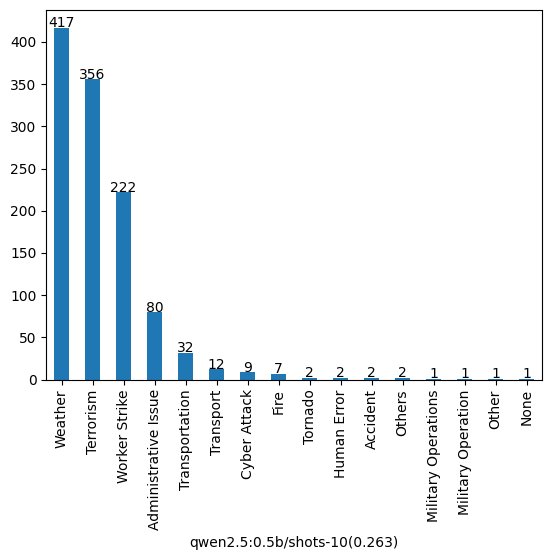

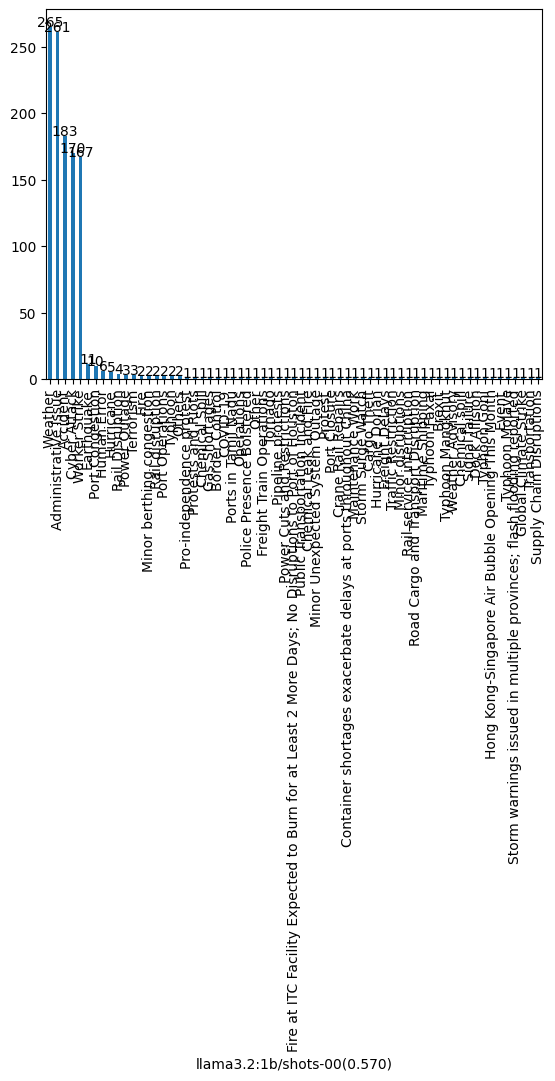

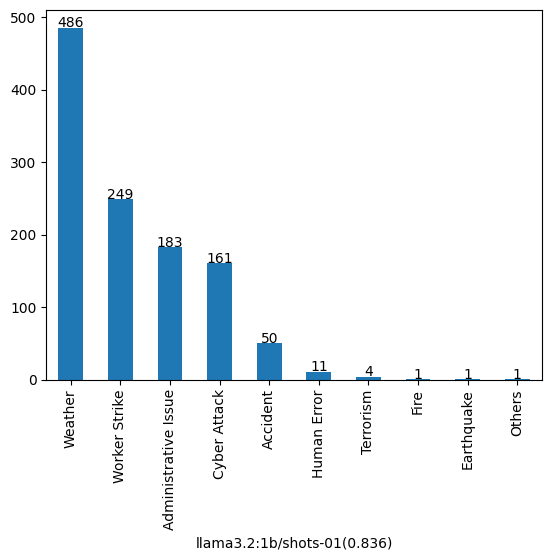

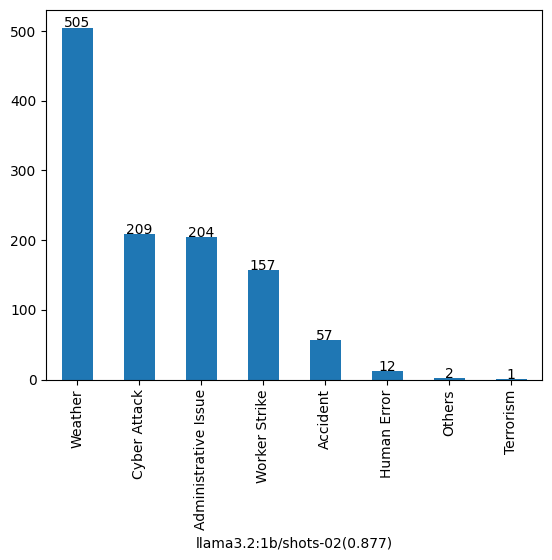

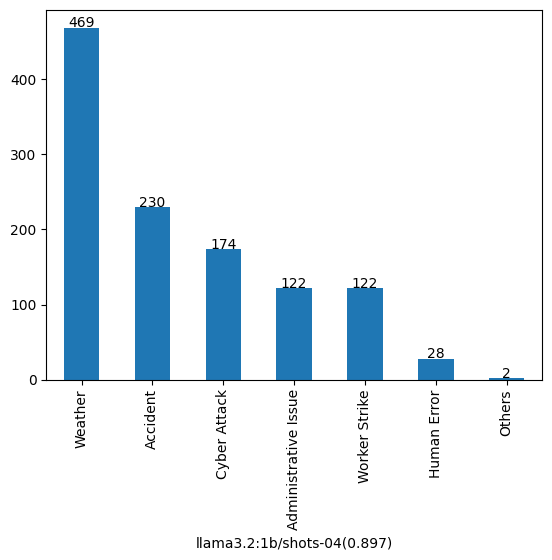

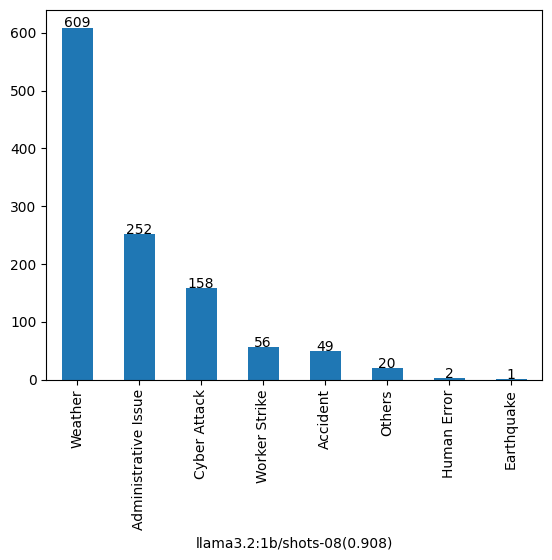

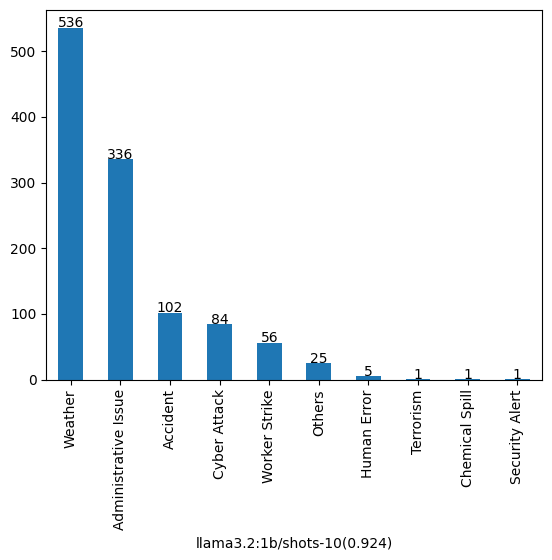

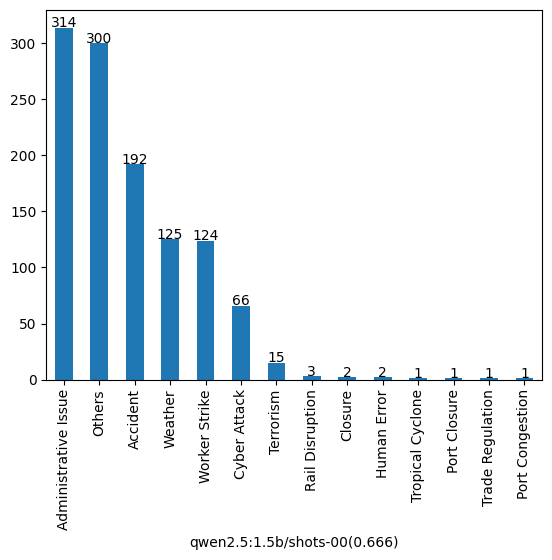

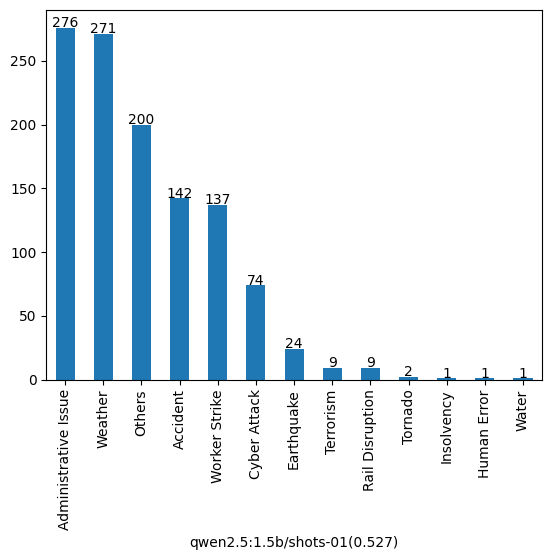

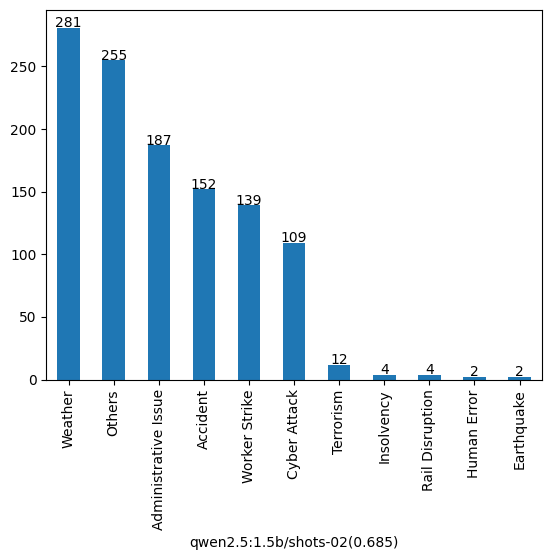

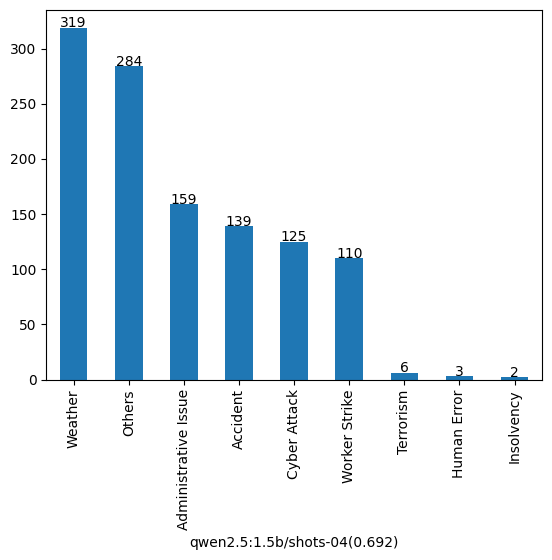

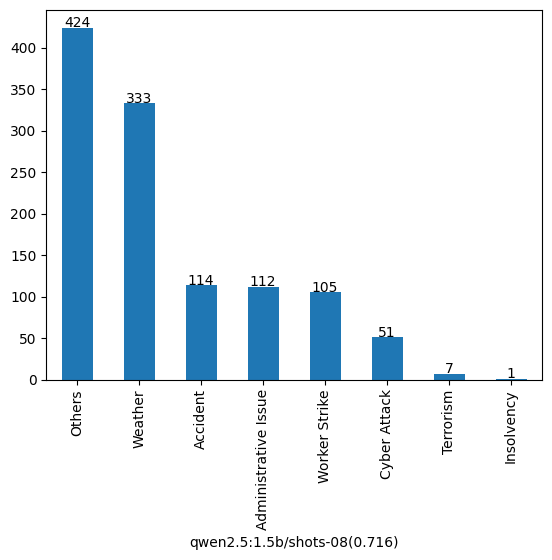

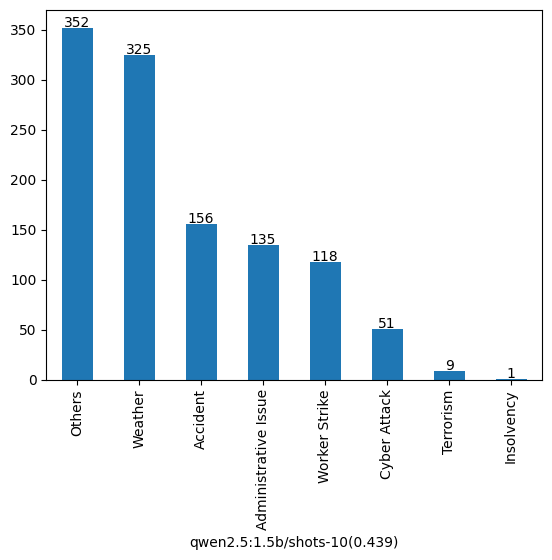

category not in json: {}


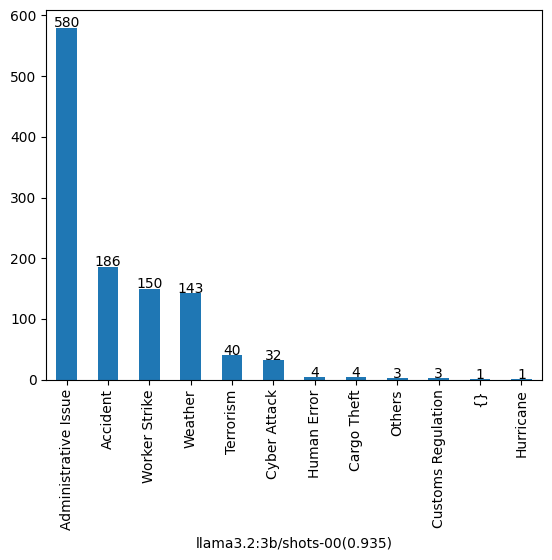

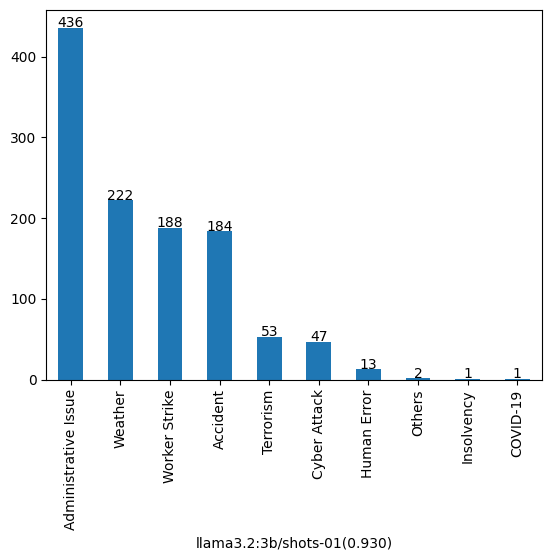

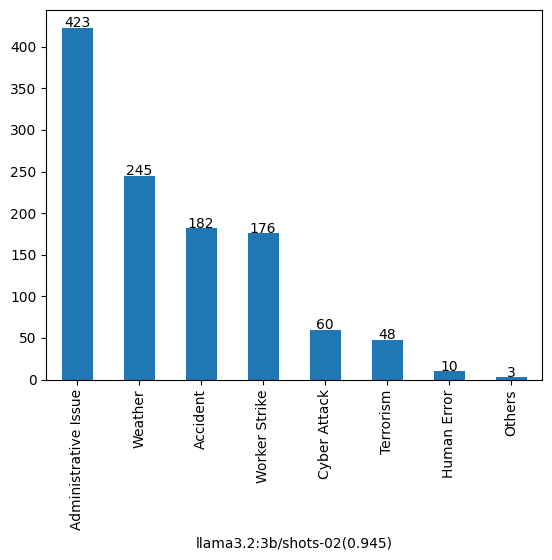

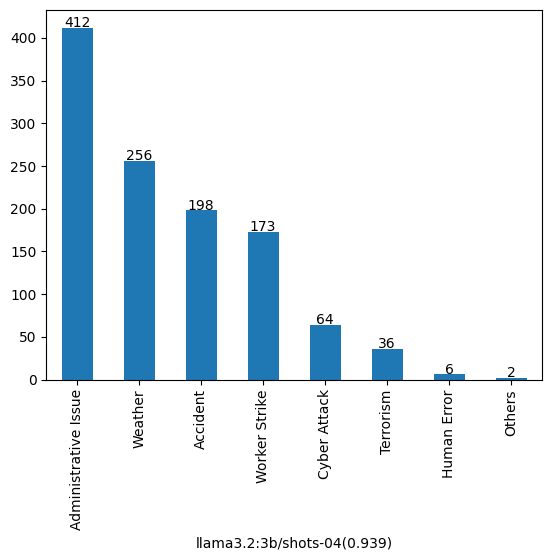

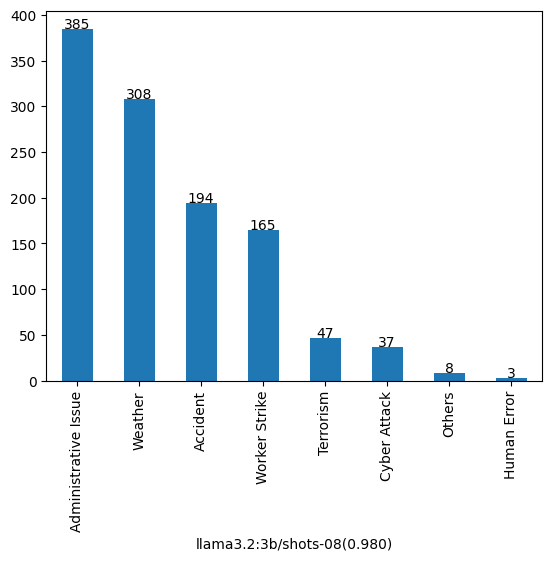

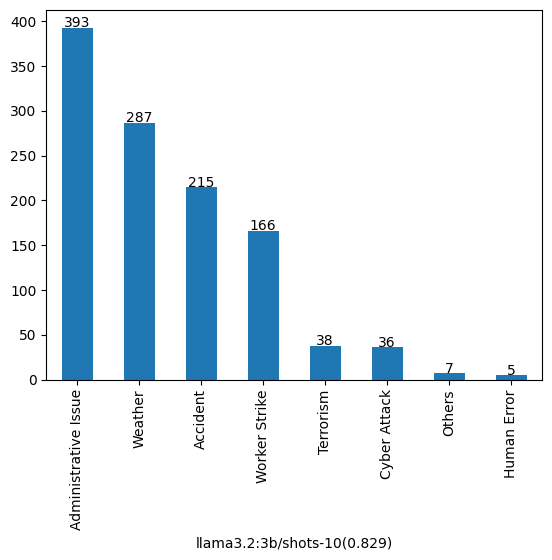

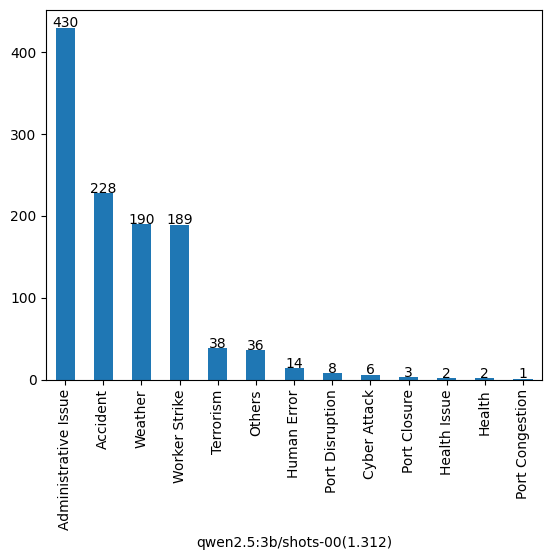

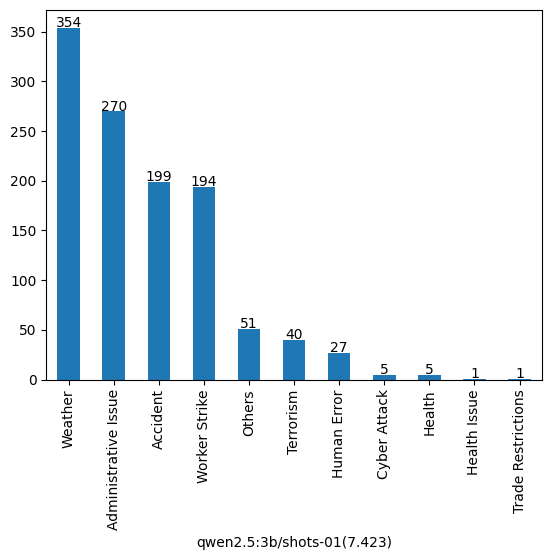

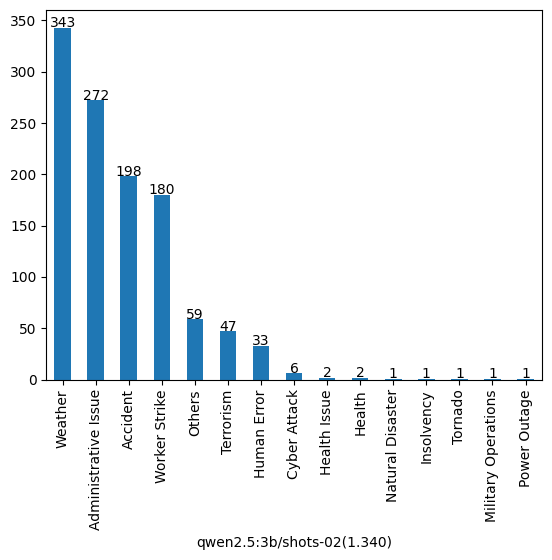

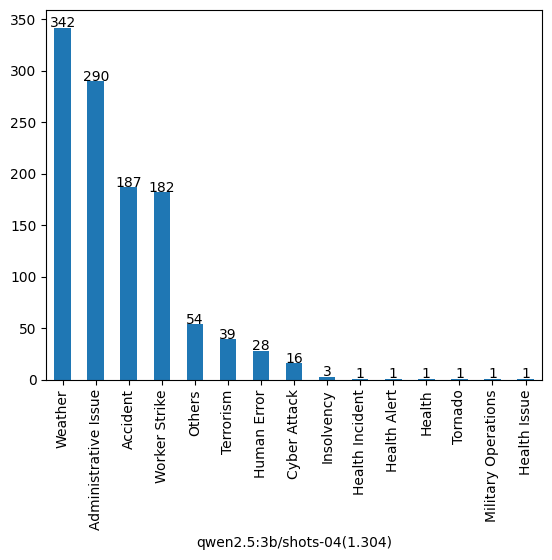

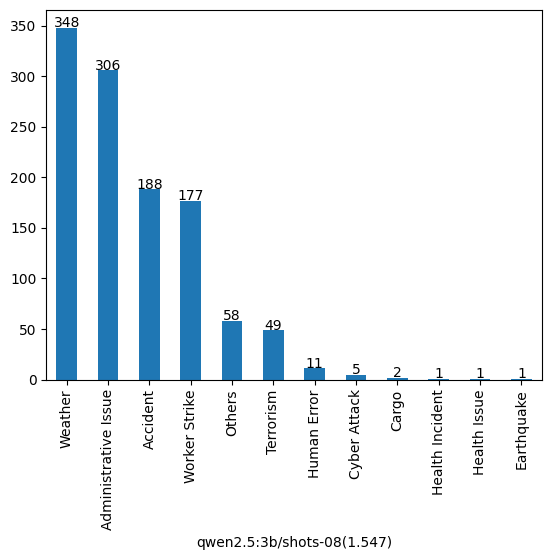

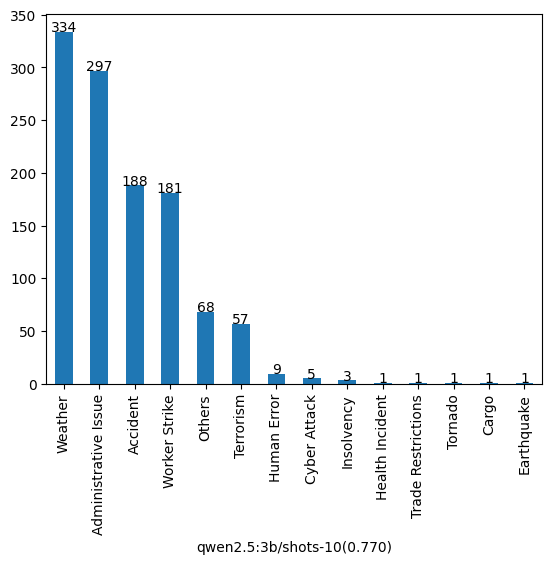

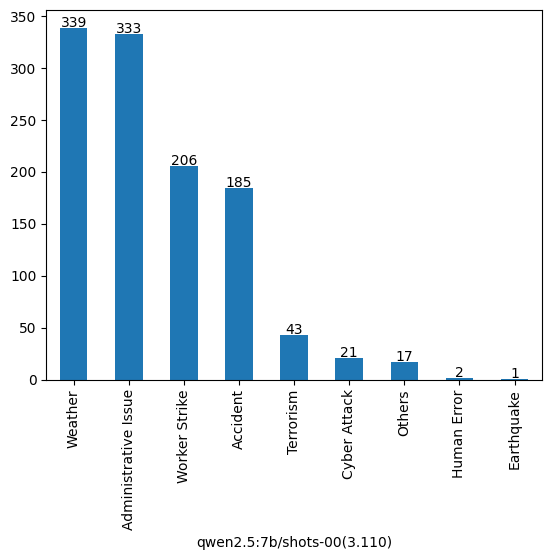

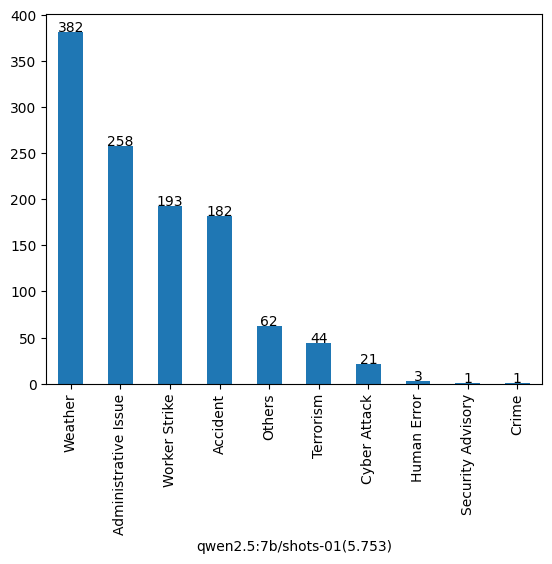

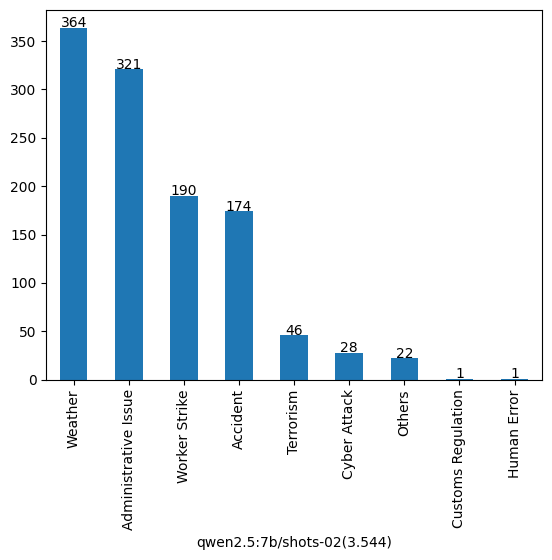

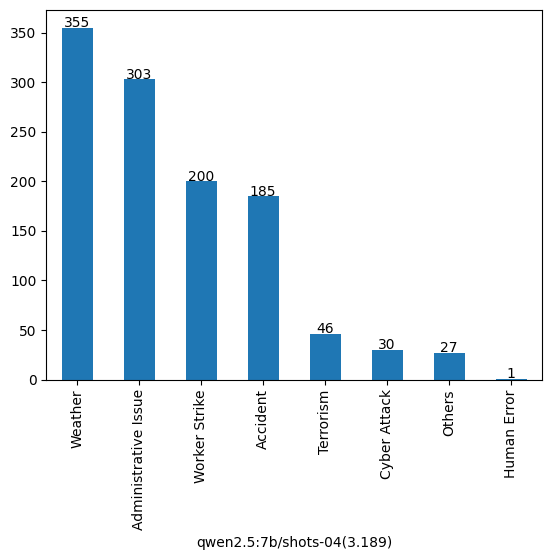

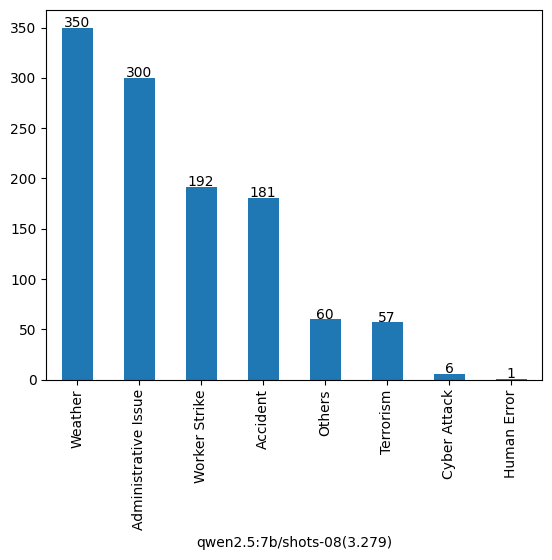

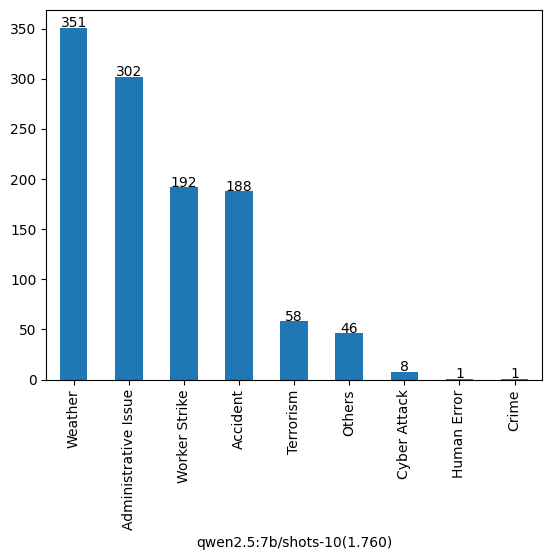

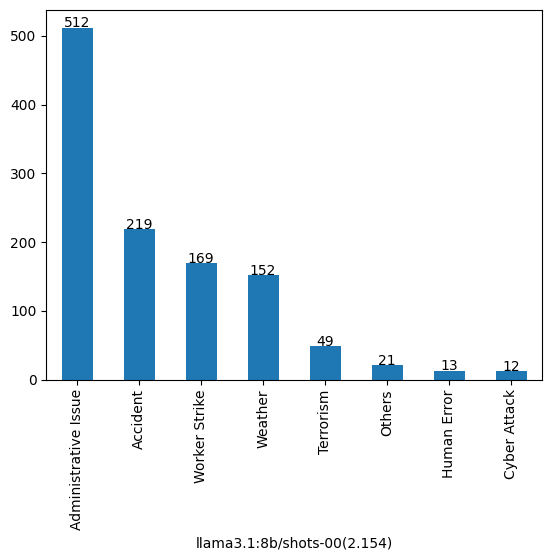

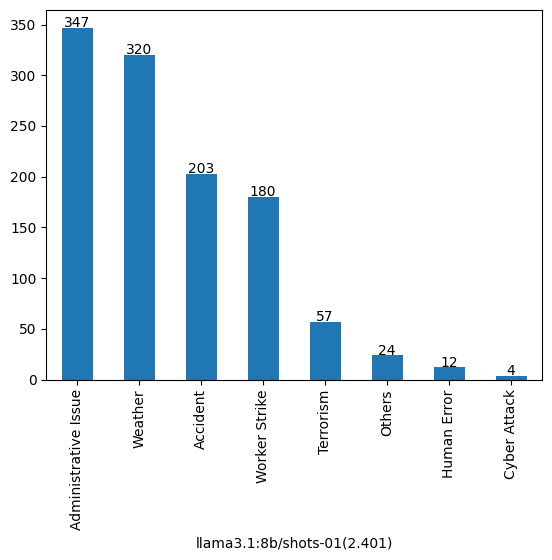

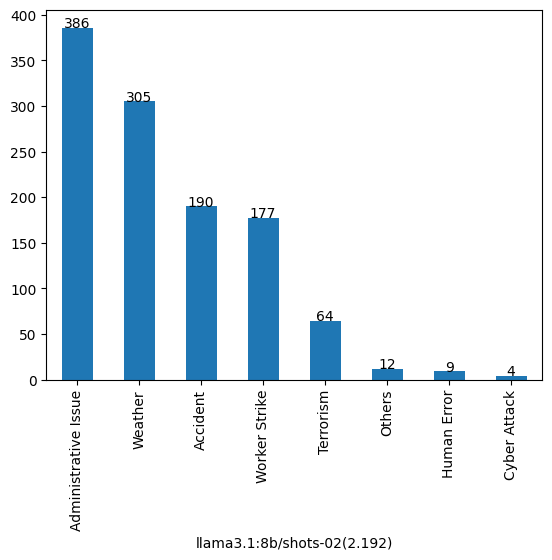

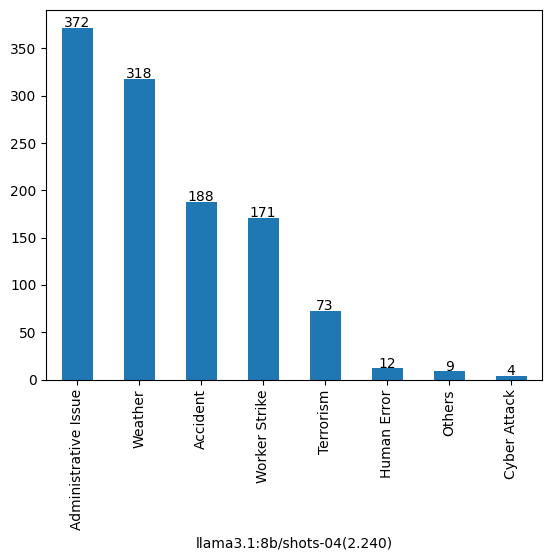

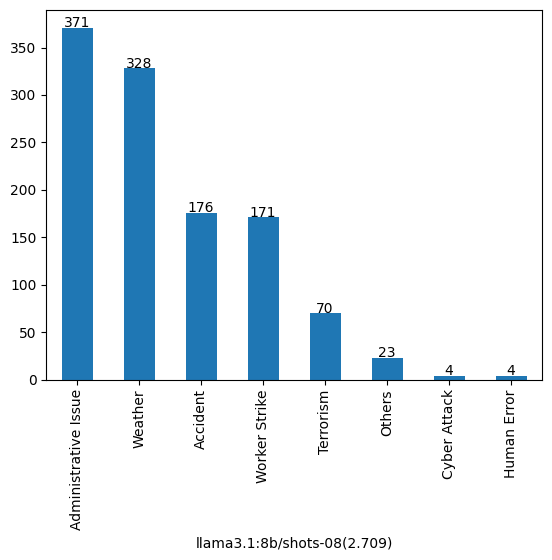

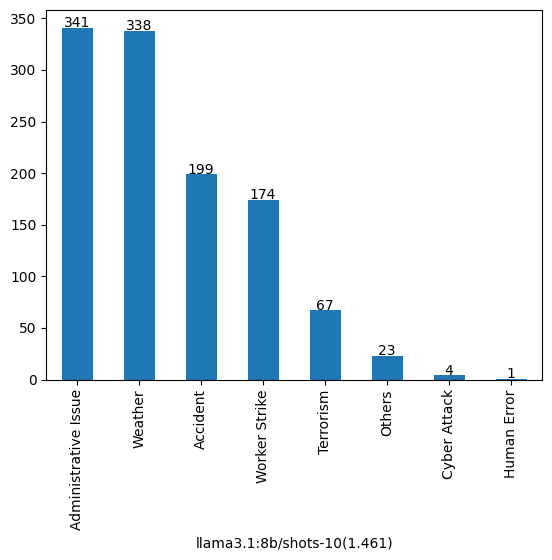

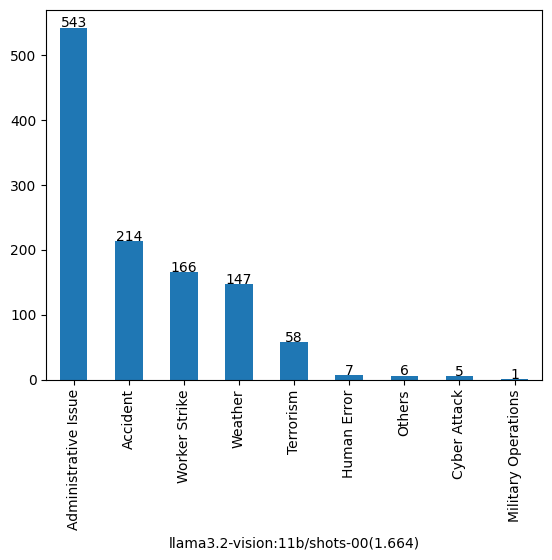

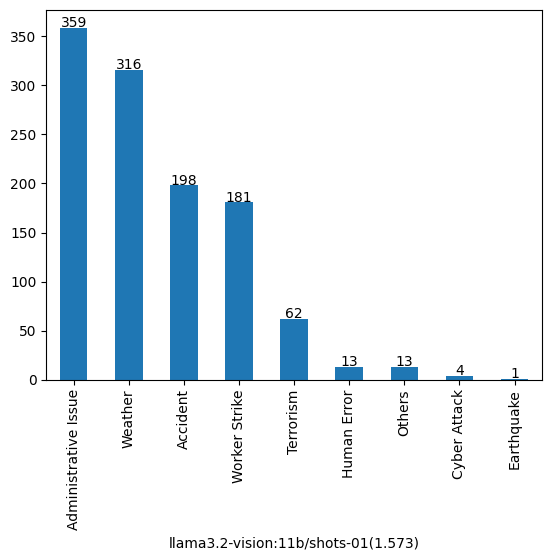

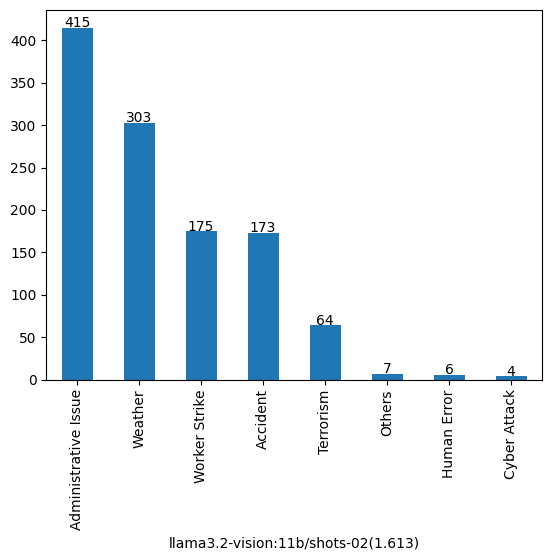

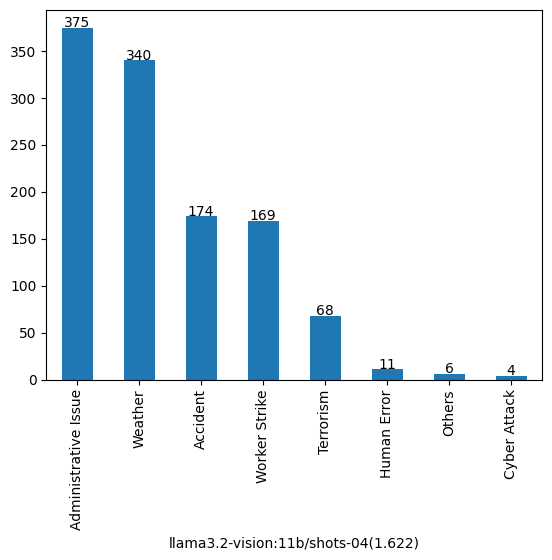

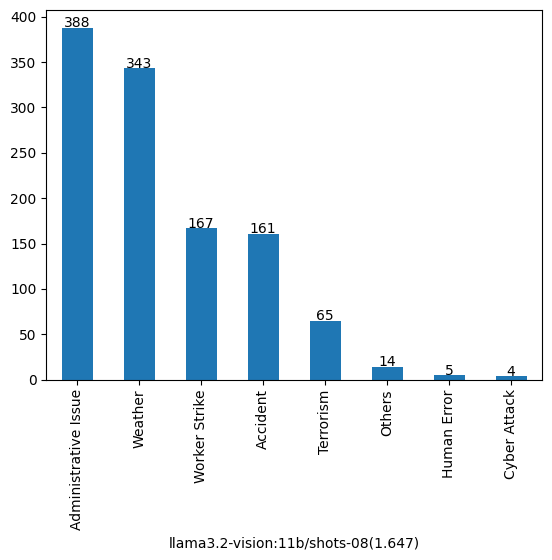

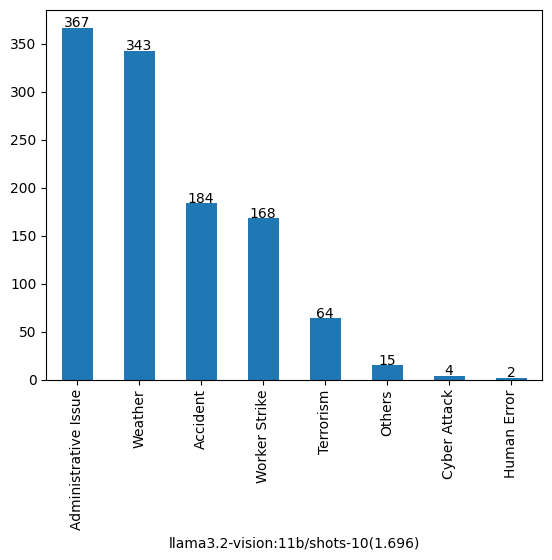

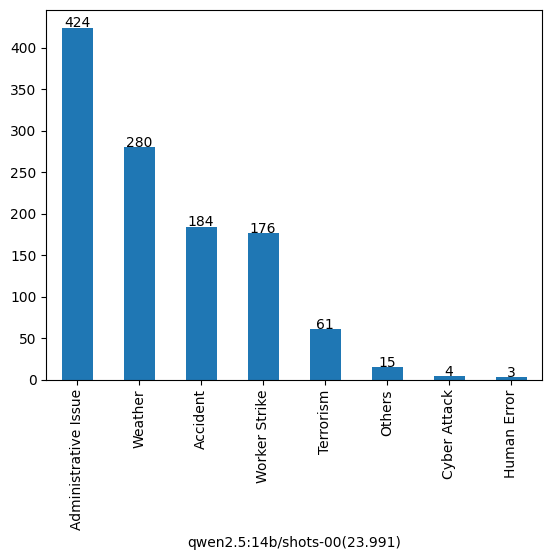

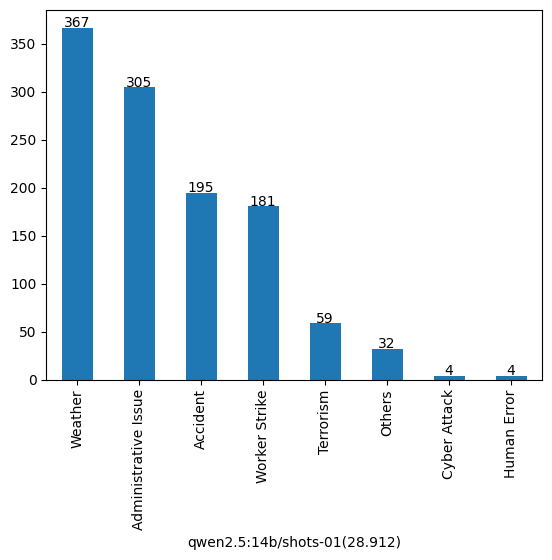

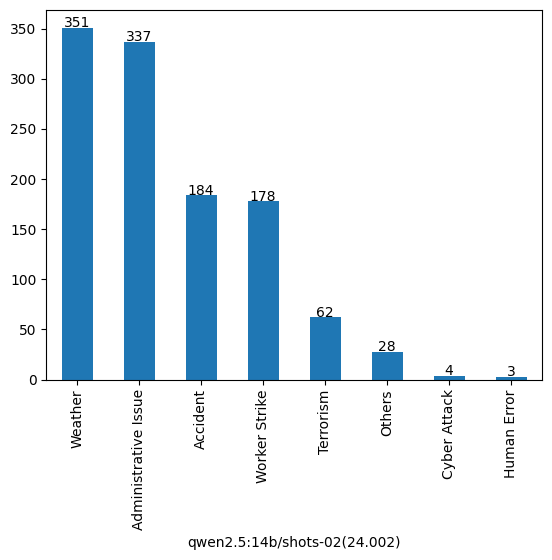

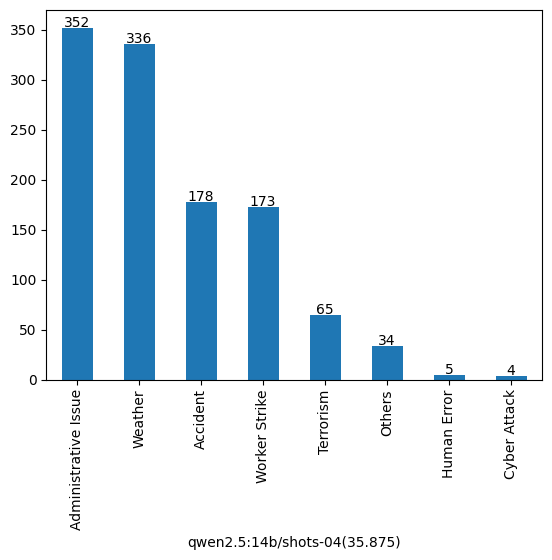

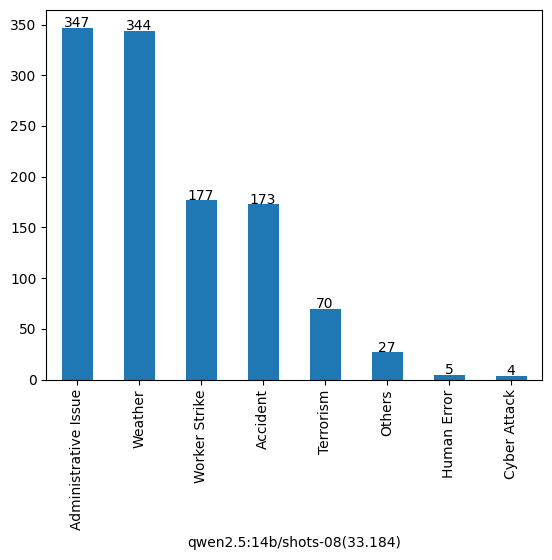

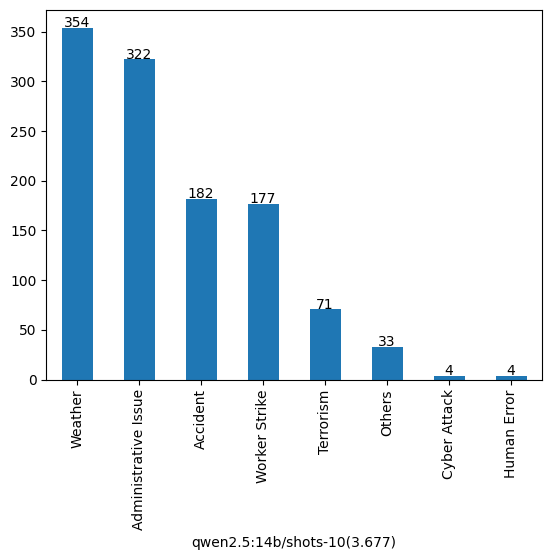

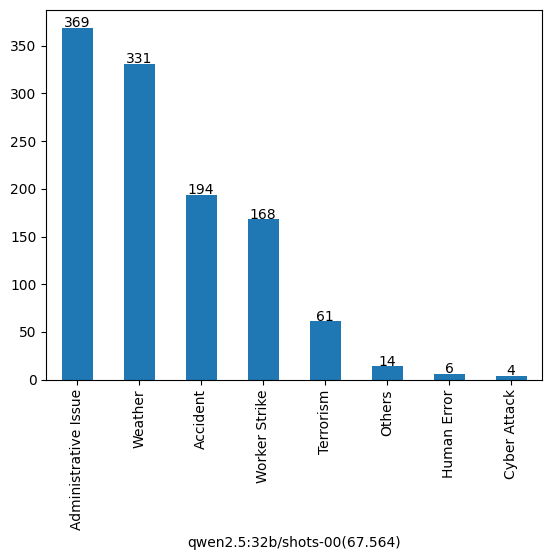

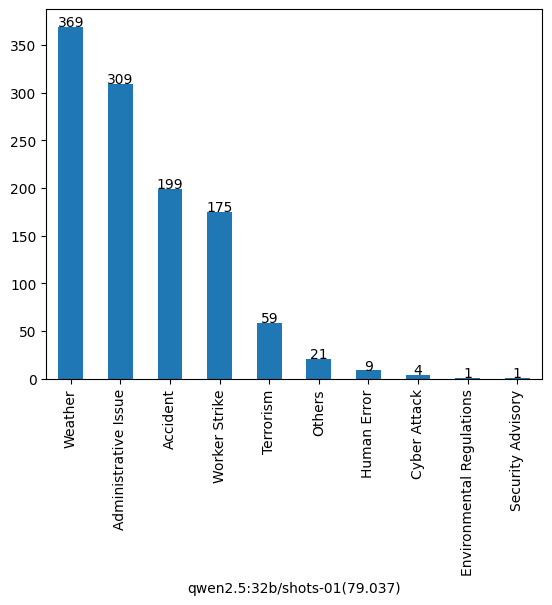

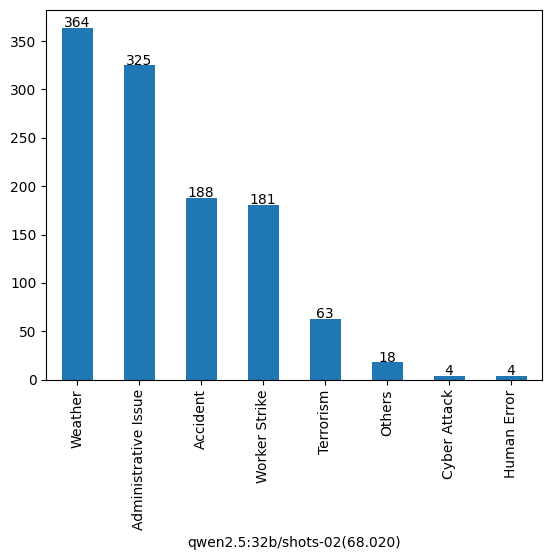

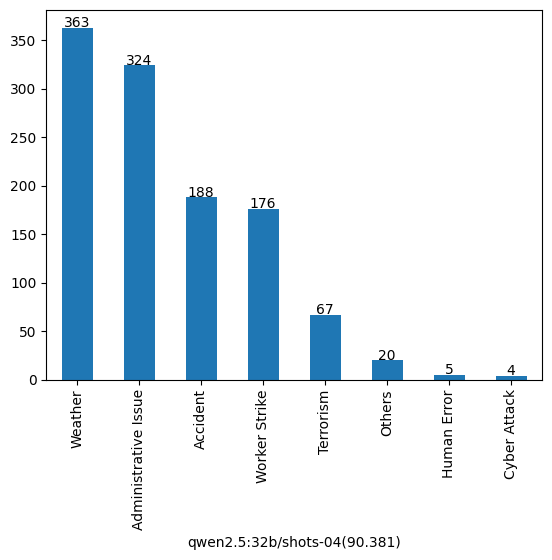

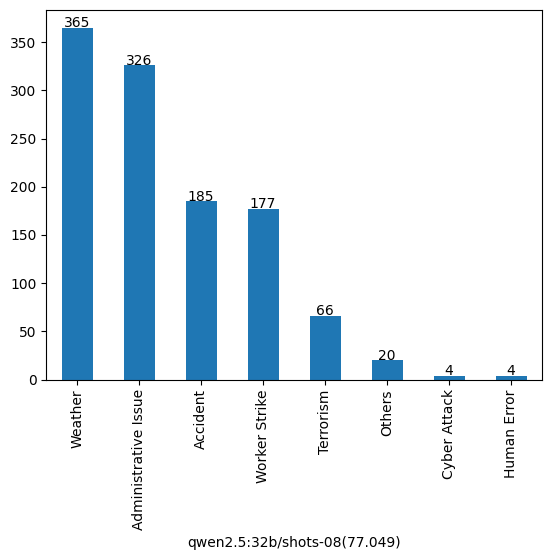

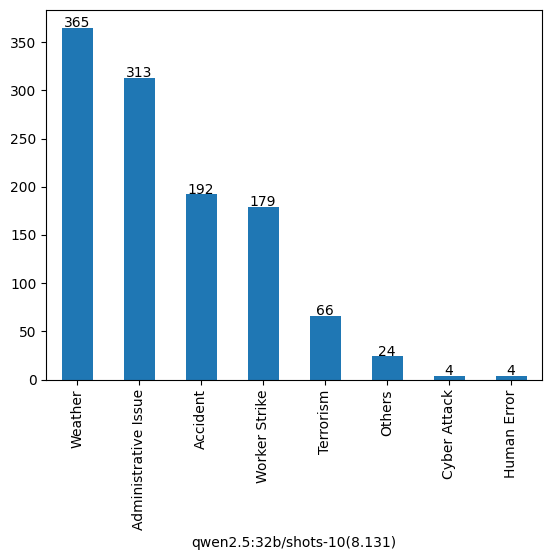

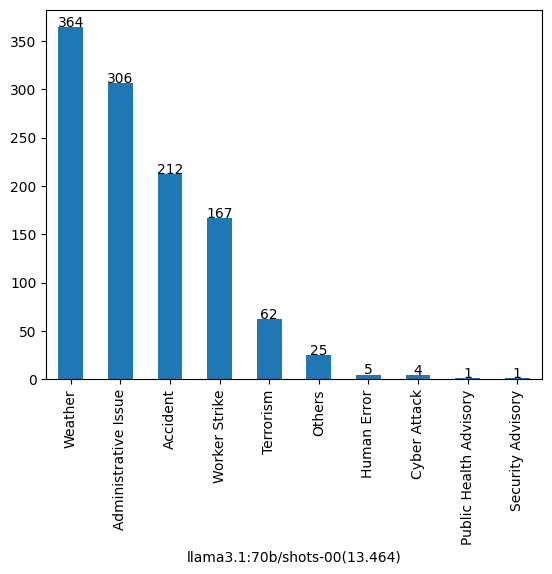

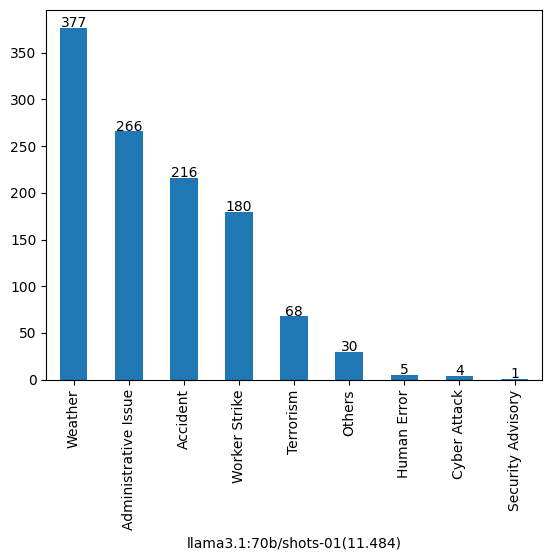

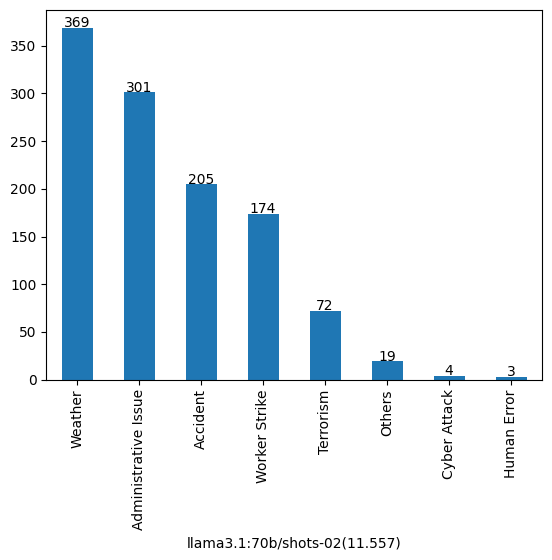

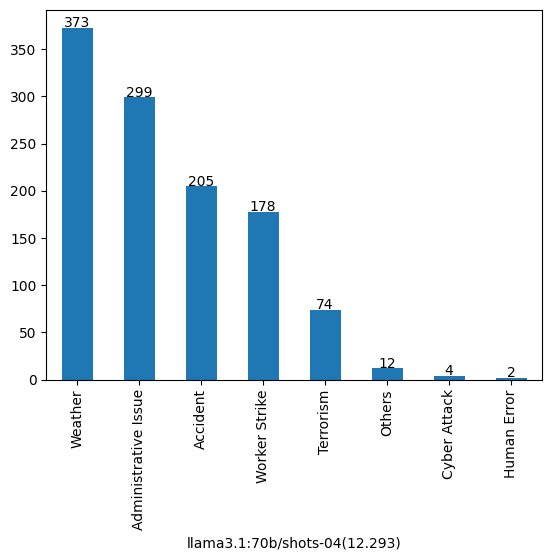

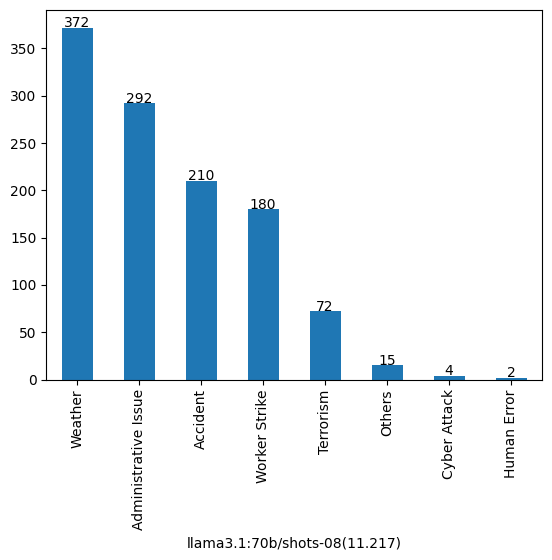

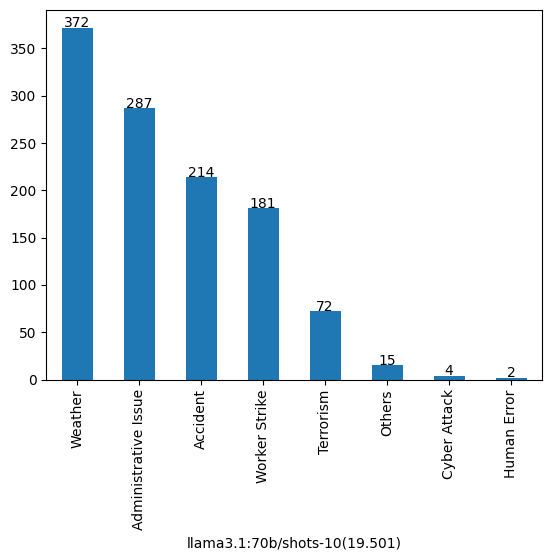

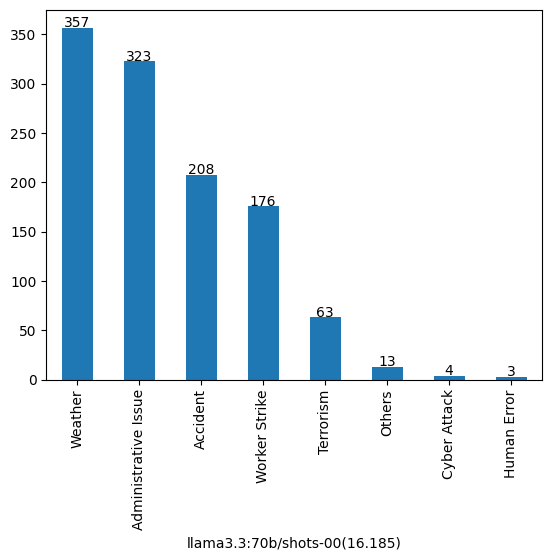

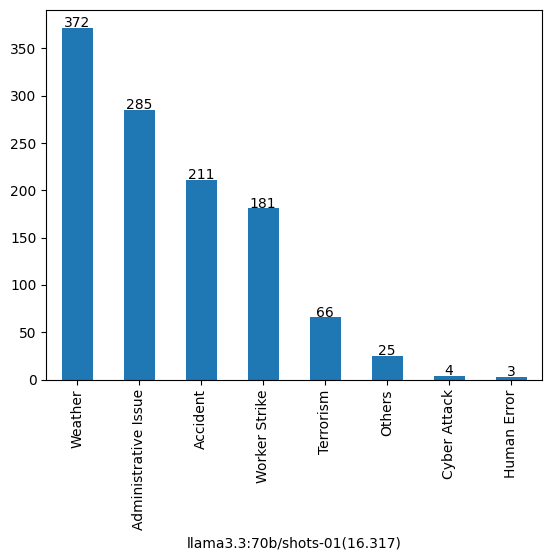

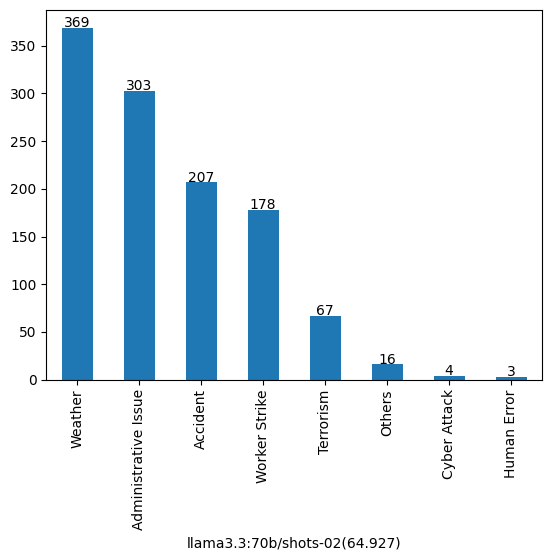

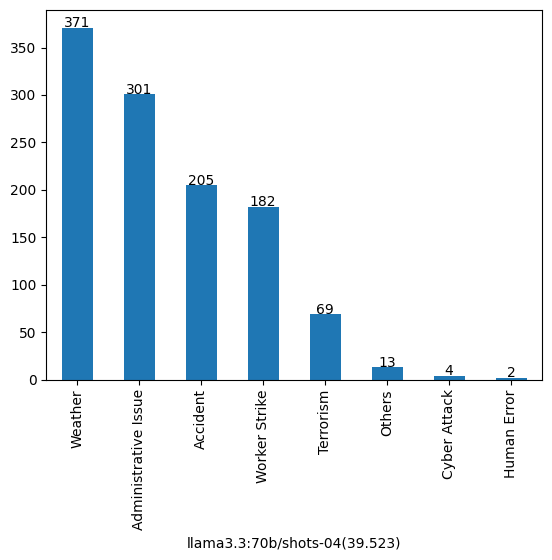

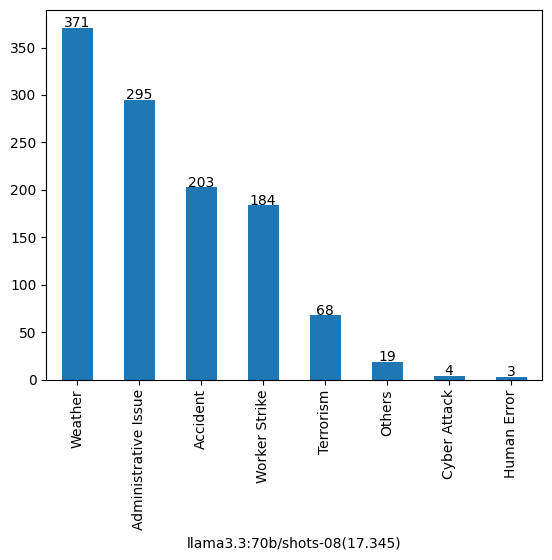

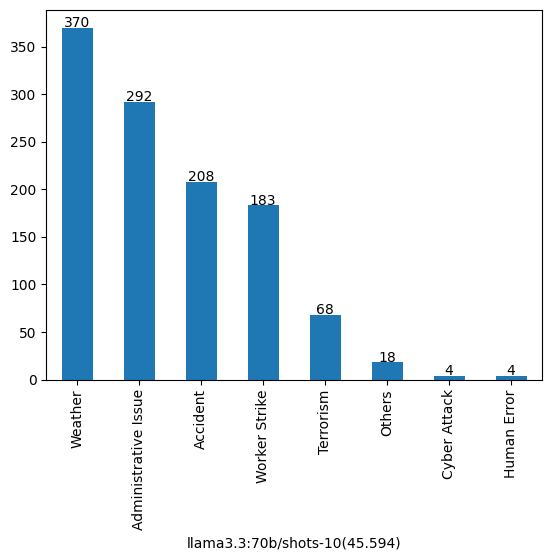

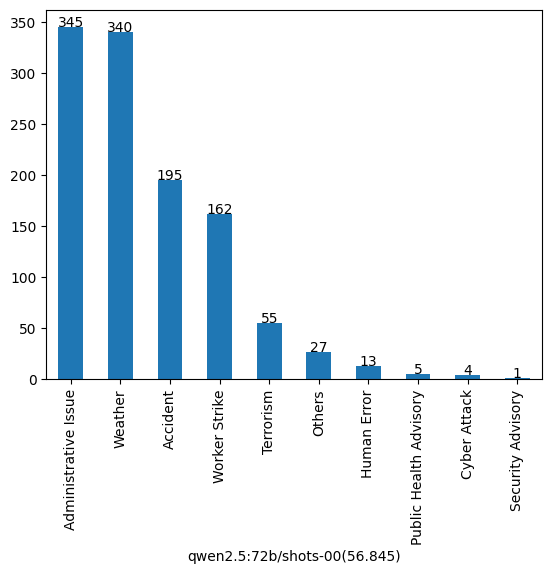

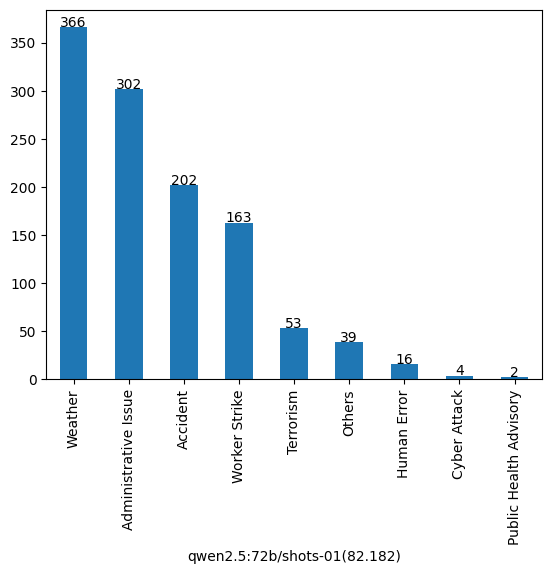

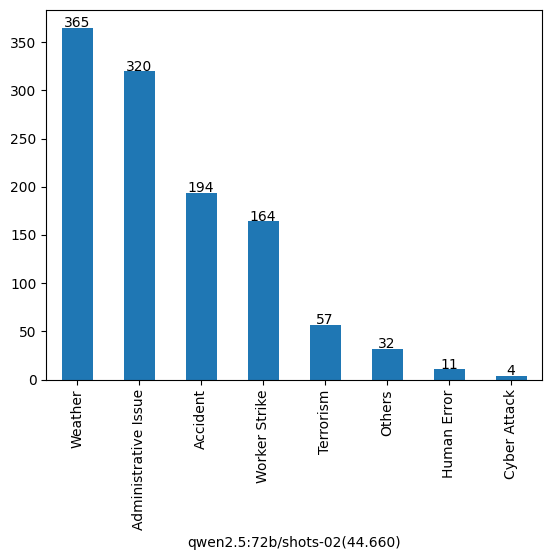

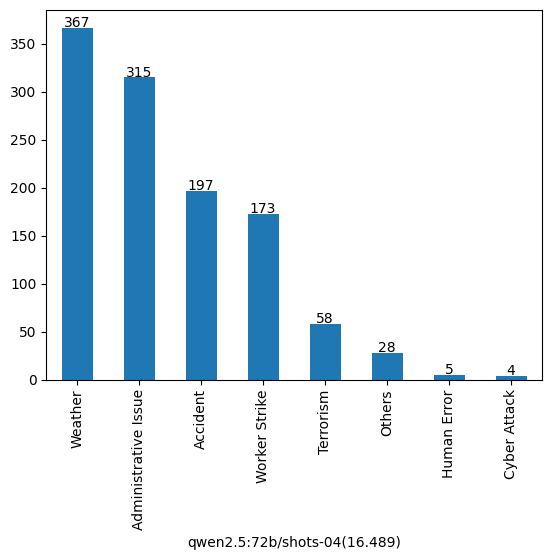

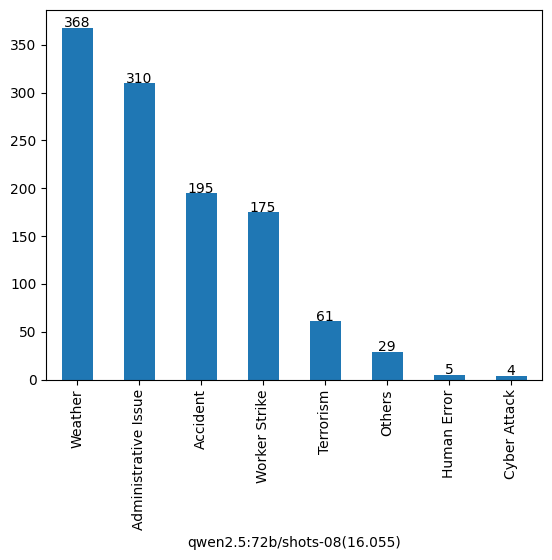

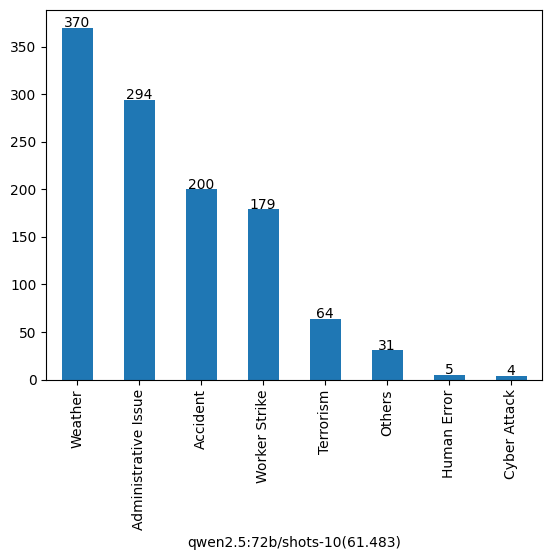

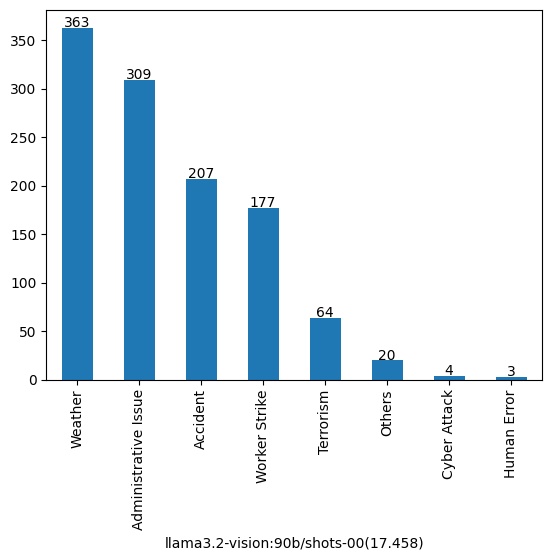

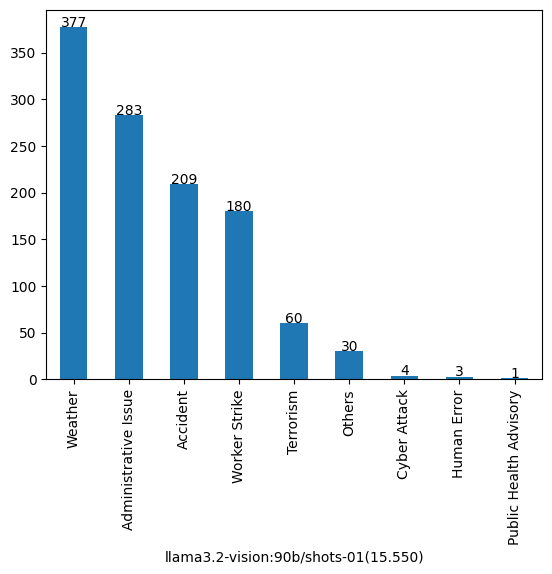

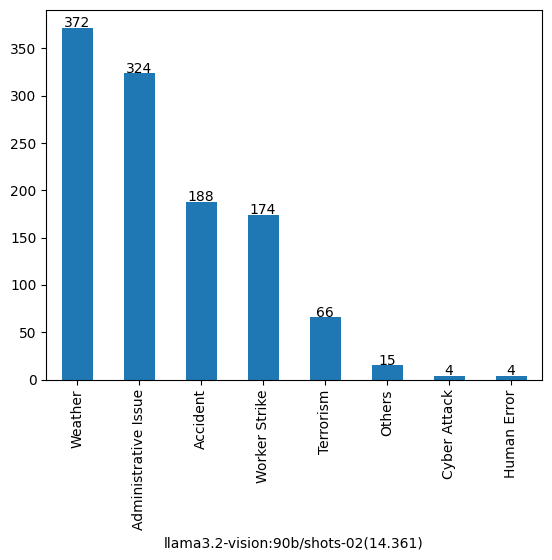

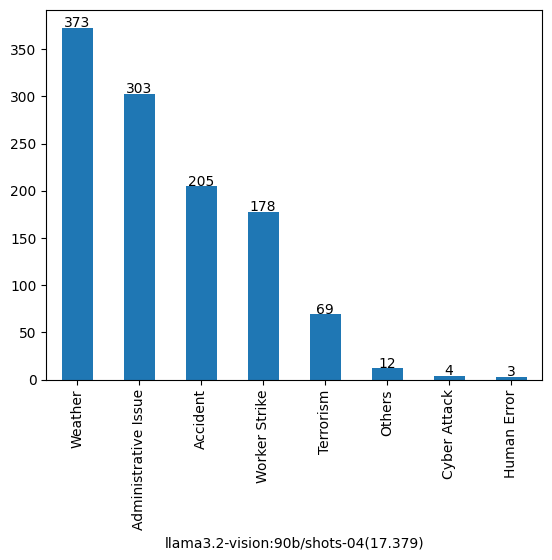

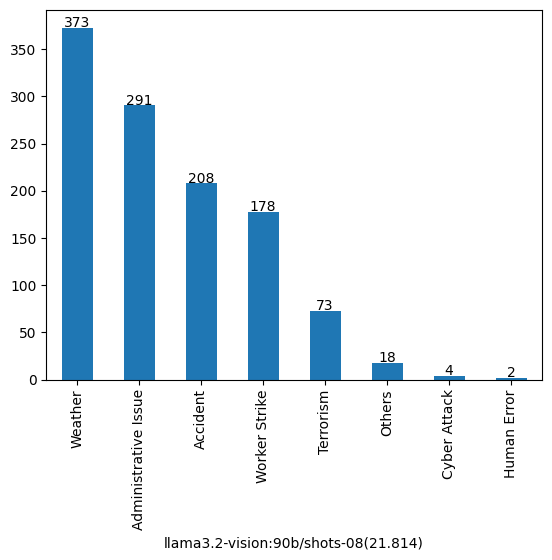

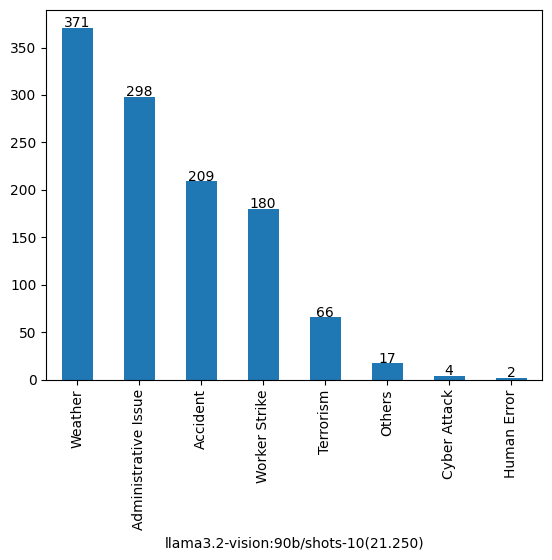

In [91]:
from llm_toolkit.data_utils import plot_bar_chart, extract_answer

for column in result_columns:
    plot_bar_chart(df, column, preprocess_func=extract_answer)